# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle to make black and white images and dashed and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [2]:
#Extra Headers:
import os as os
import pywt as py
import statistics as st
import os as os
import random
import multiprocessing
from joblib import Parallel, delayed
import platform

from time import time as ti

In [3]:
import CoreFunctions as cf
from skimage.restoration import denoise_wavelet

## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [4]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

In [5]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [6]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Recordings2/SubSet/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\SubSet\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

In [7]:
files = os.listdir(folder)

In [8]:
Saving = False
location = folder
Titles = True
Ledgends = True

f = 2

ODataSet = np.genfromtxt(open(folder+files[f],'r'), delimiter=',',skip_header=0,missing_values=0)
print(files[f],np.shape(ODataSet))
#ODataSet = ODataSet[start:end,:]

length = np.shape(ODataSet)[0]


221020 recording1.csv (6874827, 7)


In [9]:

def getVelocity(Acceleration, Timestamps = 0.003, corrected = False):
    velocity = np.zeros(len(Acceleration))
    
    if len(Timestamps) == 1:
        dTime = Timestamps
    elif len(Timestamps) == len(Acceleration):
        totTime = 0
        for i in range(len(Timestamps)-1):
            if Timestamps[i]<Timestamps[i+1]:
                totTime += (Timestamps[i+1] - Timestamps[i])
            else:
                totTime += (Timestamps[i+1] - Timestamps[i] + 10000)
        dTime = totTime / len(Timestamps)
    else:
        print('error')

    dTime = dTime / 10000.0

    velocity[0] = Acceleration[0] * (dTime)

    for i in range(len(Acceleration)-1):
        j = i + 1
        velocity[j] = velocity[i] + Acceleration[j] * dTime

    if corrected:
        PointVairance = velocity[-1:] / len(velocity)
        for i in range(len(velocity)):
            velocity[i] -=  PointVairance * i
    
    velocity *= 9.81

    return velocity



In [10]:
def RollingStdDev(RawData, SmoothData, RollSize = 25):
    StdDevs = []
    for i in range(RollSize):
        Diffs = RawData[0:i+1]-SmoothData[0:i+1]
        Sqs = Diffs * Diffs
        Var = sum(Sqs) / (i+1)
        StdDev = np.sqrt(Var)
        StdDevs.append(StdDev)
    for i in range(len(RawData)-RollSize-1):
        j = i + RollSize
        Diffs = RawData[i:j]-SmoothData[i:j]
        Sqs = Diffs * Diffs
        Var = sum(Sqs) / RollSize
        StdDev = np.sqrt(Var)
        StdDevs.append(StdDev)  
    
    return StdDevs

def RollingSum(Data, Length = 100):
    RollSumStdDev = []
    for i in range(Length):
        RollSumStdDev.append(sum(SmoothDev[0:i+1]))
    for i in range(len(SmoothDev - Length - 1)):
        RollSumStdDev.append(sum(SmoothDev[i:i+Length]))
    return RollSumStdDev

In [11]:
#Smooth = cf.Smoothing(ODataSet[:,3],2) #,50)
Smooth = denoise_wavelet(ODataSet[:,3], method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym2', rescale_sigma='True')

In [12]:
StdDevs = RollingStdDev(ODataSet[:,3],Smooth)

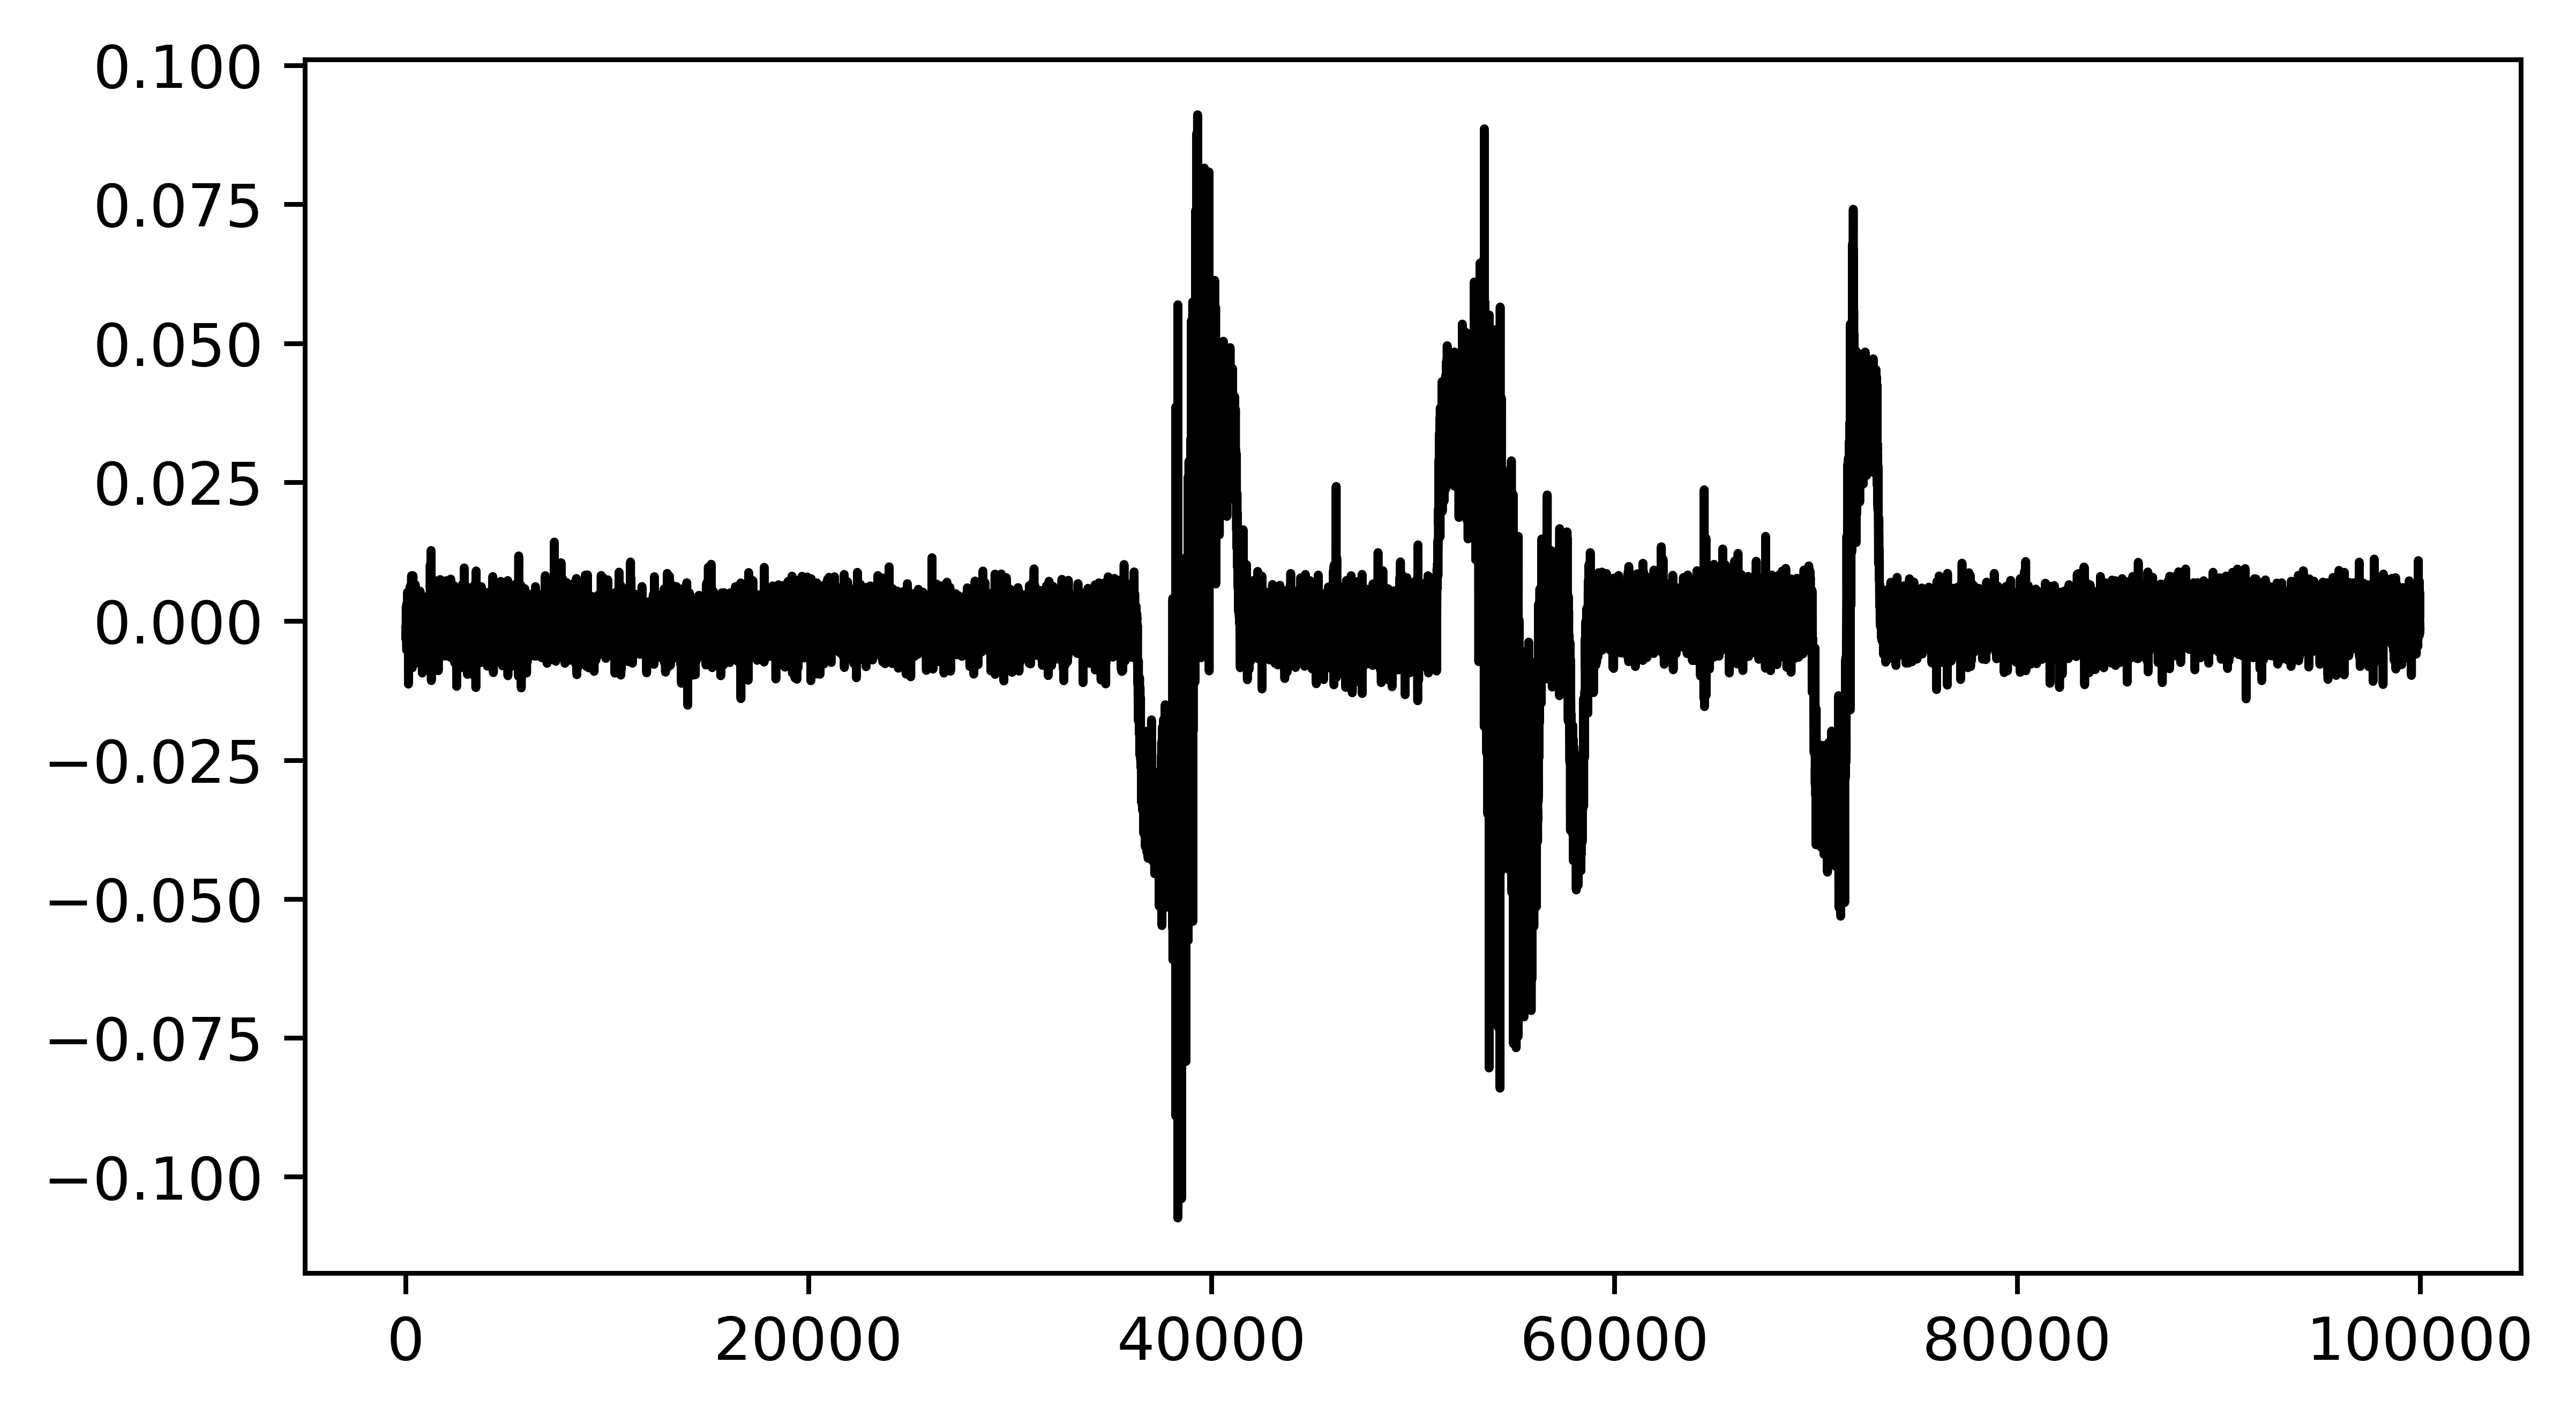

In [13]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.25)
plt.plot(Smooth[3425000:3525000])

plt.show()

In [14]:
start = 3425000
length = 100000
end = start+length

Velocity = getVelocity(Smooth[start:end], ODataSet[start:end,2], True)


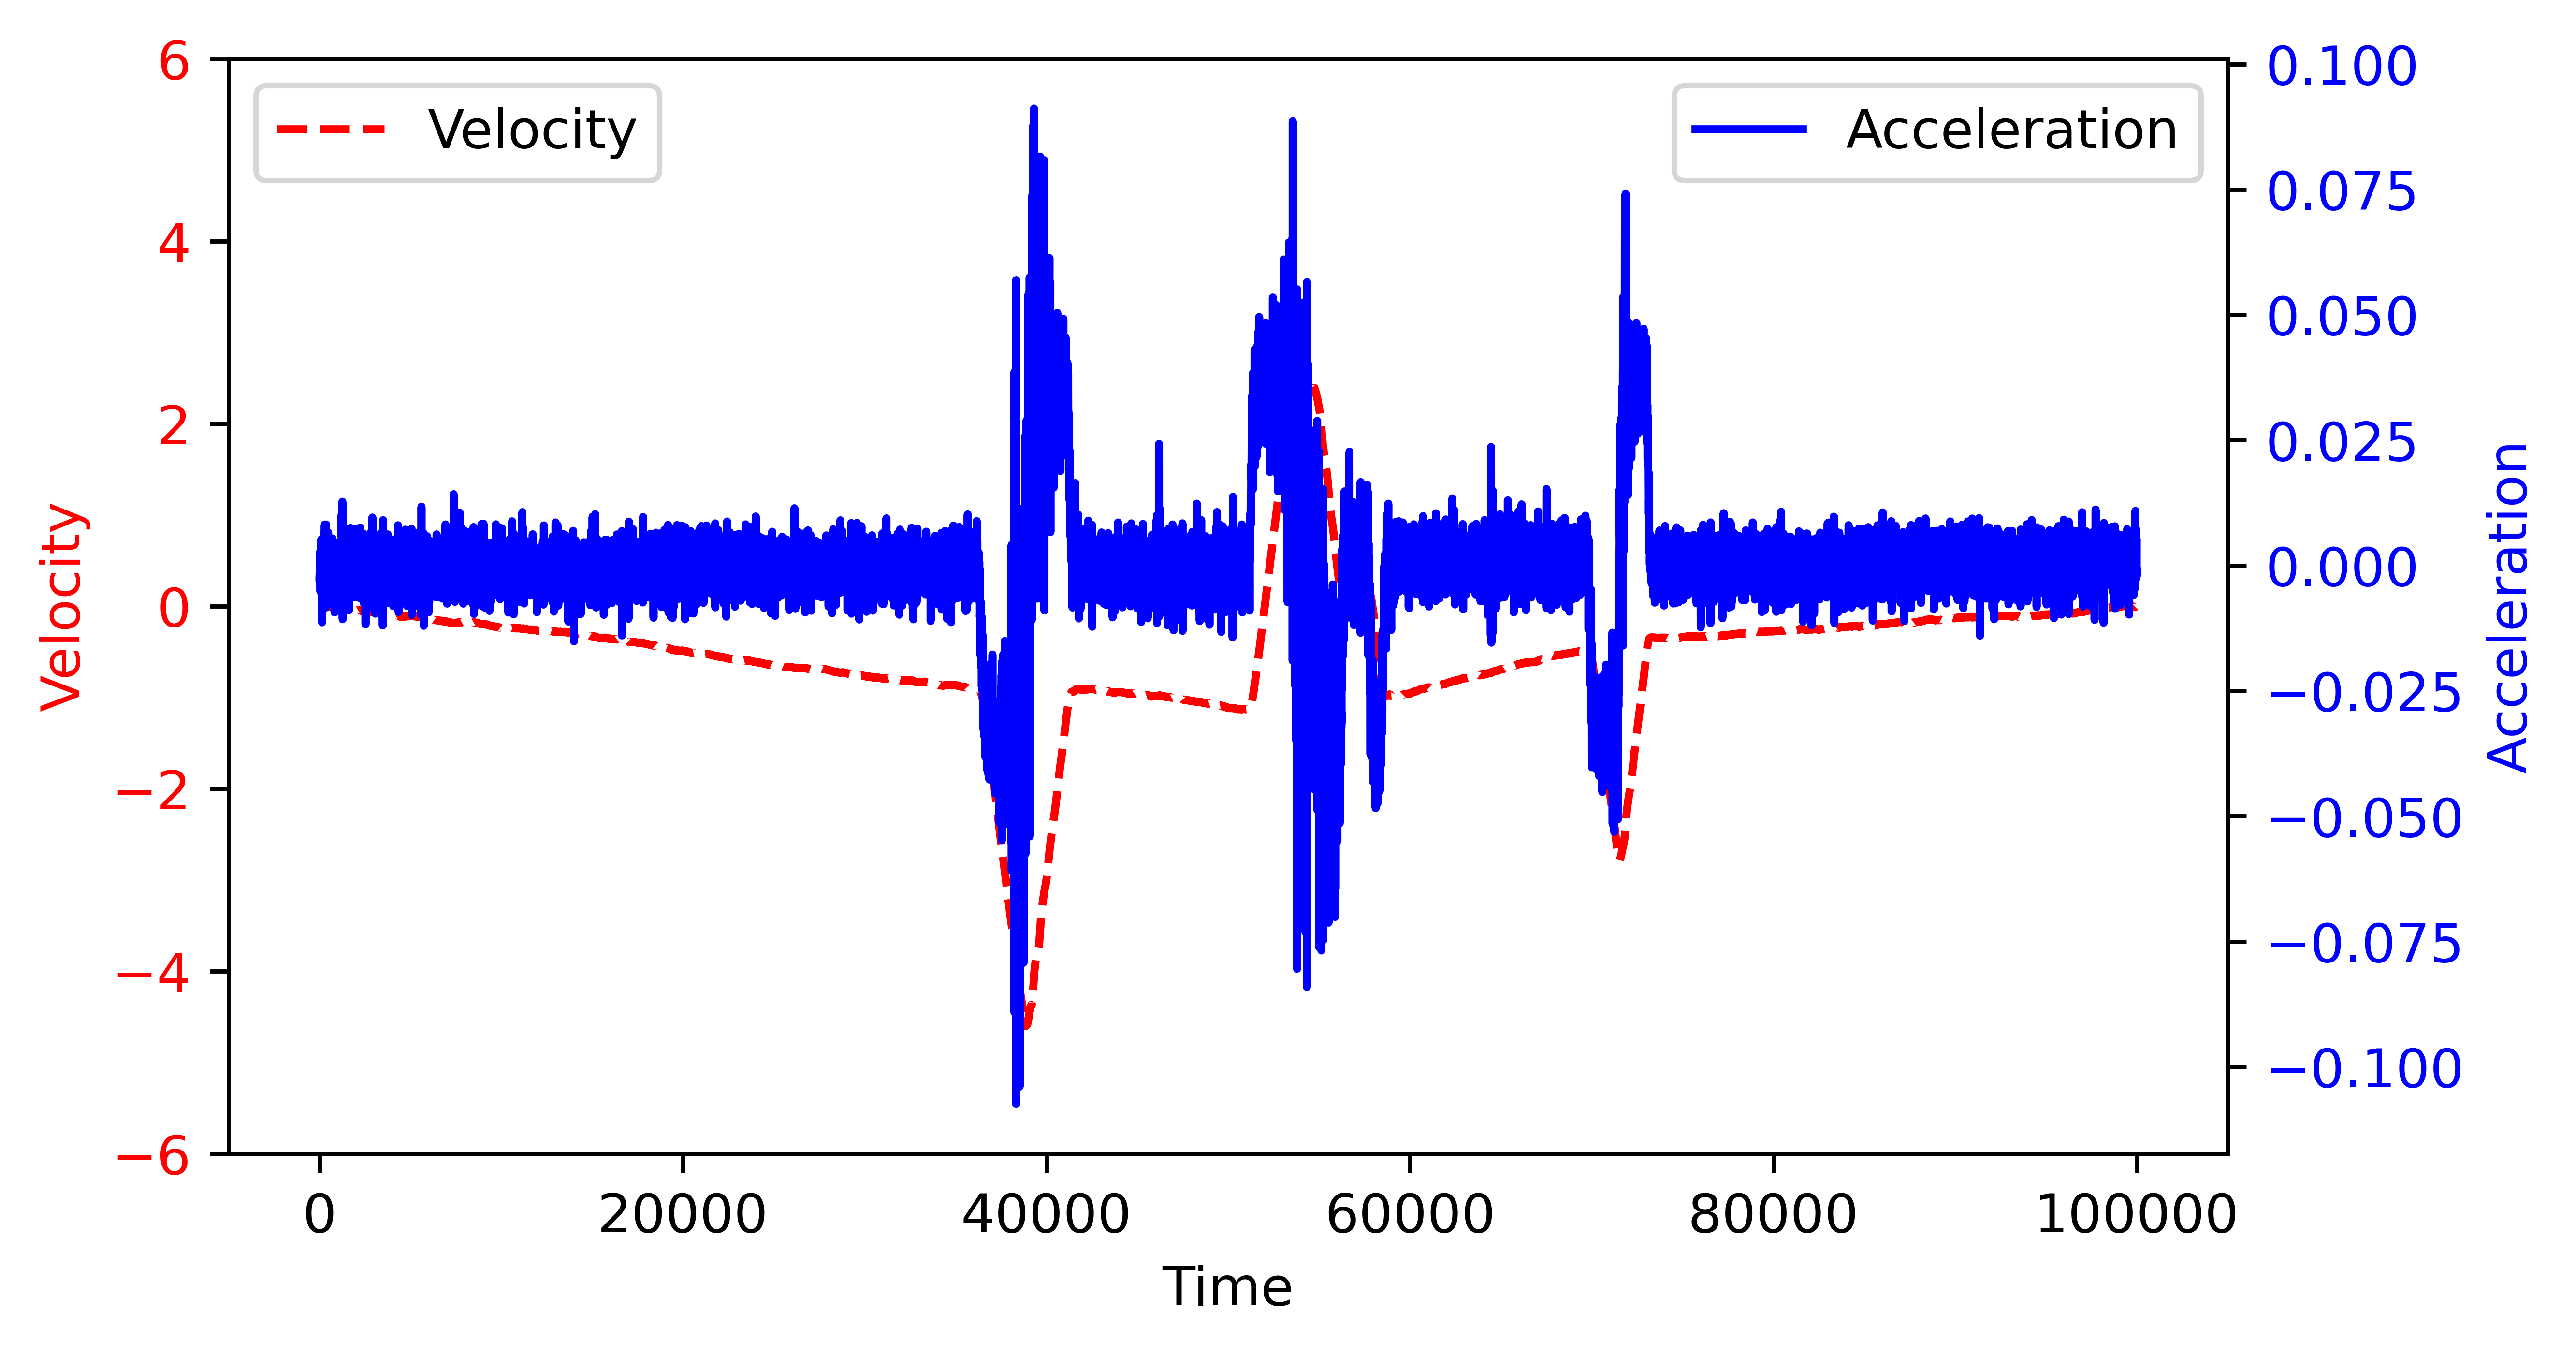

In [15]:
fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 

ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red') 
ax1.plot(range(len(Velocity)), Velocity, color = 'red', linestyle = 'dashed', label='Velocity' )
ax1.tick_params(axis ='y', labelcolor = 'red') 
plt.ylim(-6,6)
legend_1 = ax1.legend(loc=2)
legend_1.remove()

# Adding Twin Axes

ax2 = ax1.twinx() 

ax2.set_ylabel('Acceleration', color = 'blue') 
ax2.plot(range(len(Velocity)), Smooth[start:end], color = 'blue', label='Acceleration') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
#plt.ylim(-0.4,0.4)
ax2.legend(loc=1)
ax2.add_artist(legend_1)
# Show plot

plt.show()

In [16]:
Velocity = np.abs(Velocity)

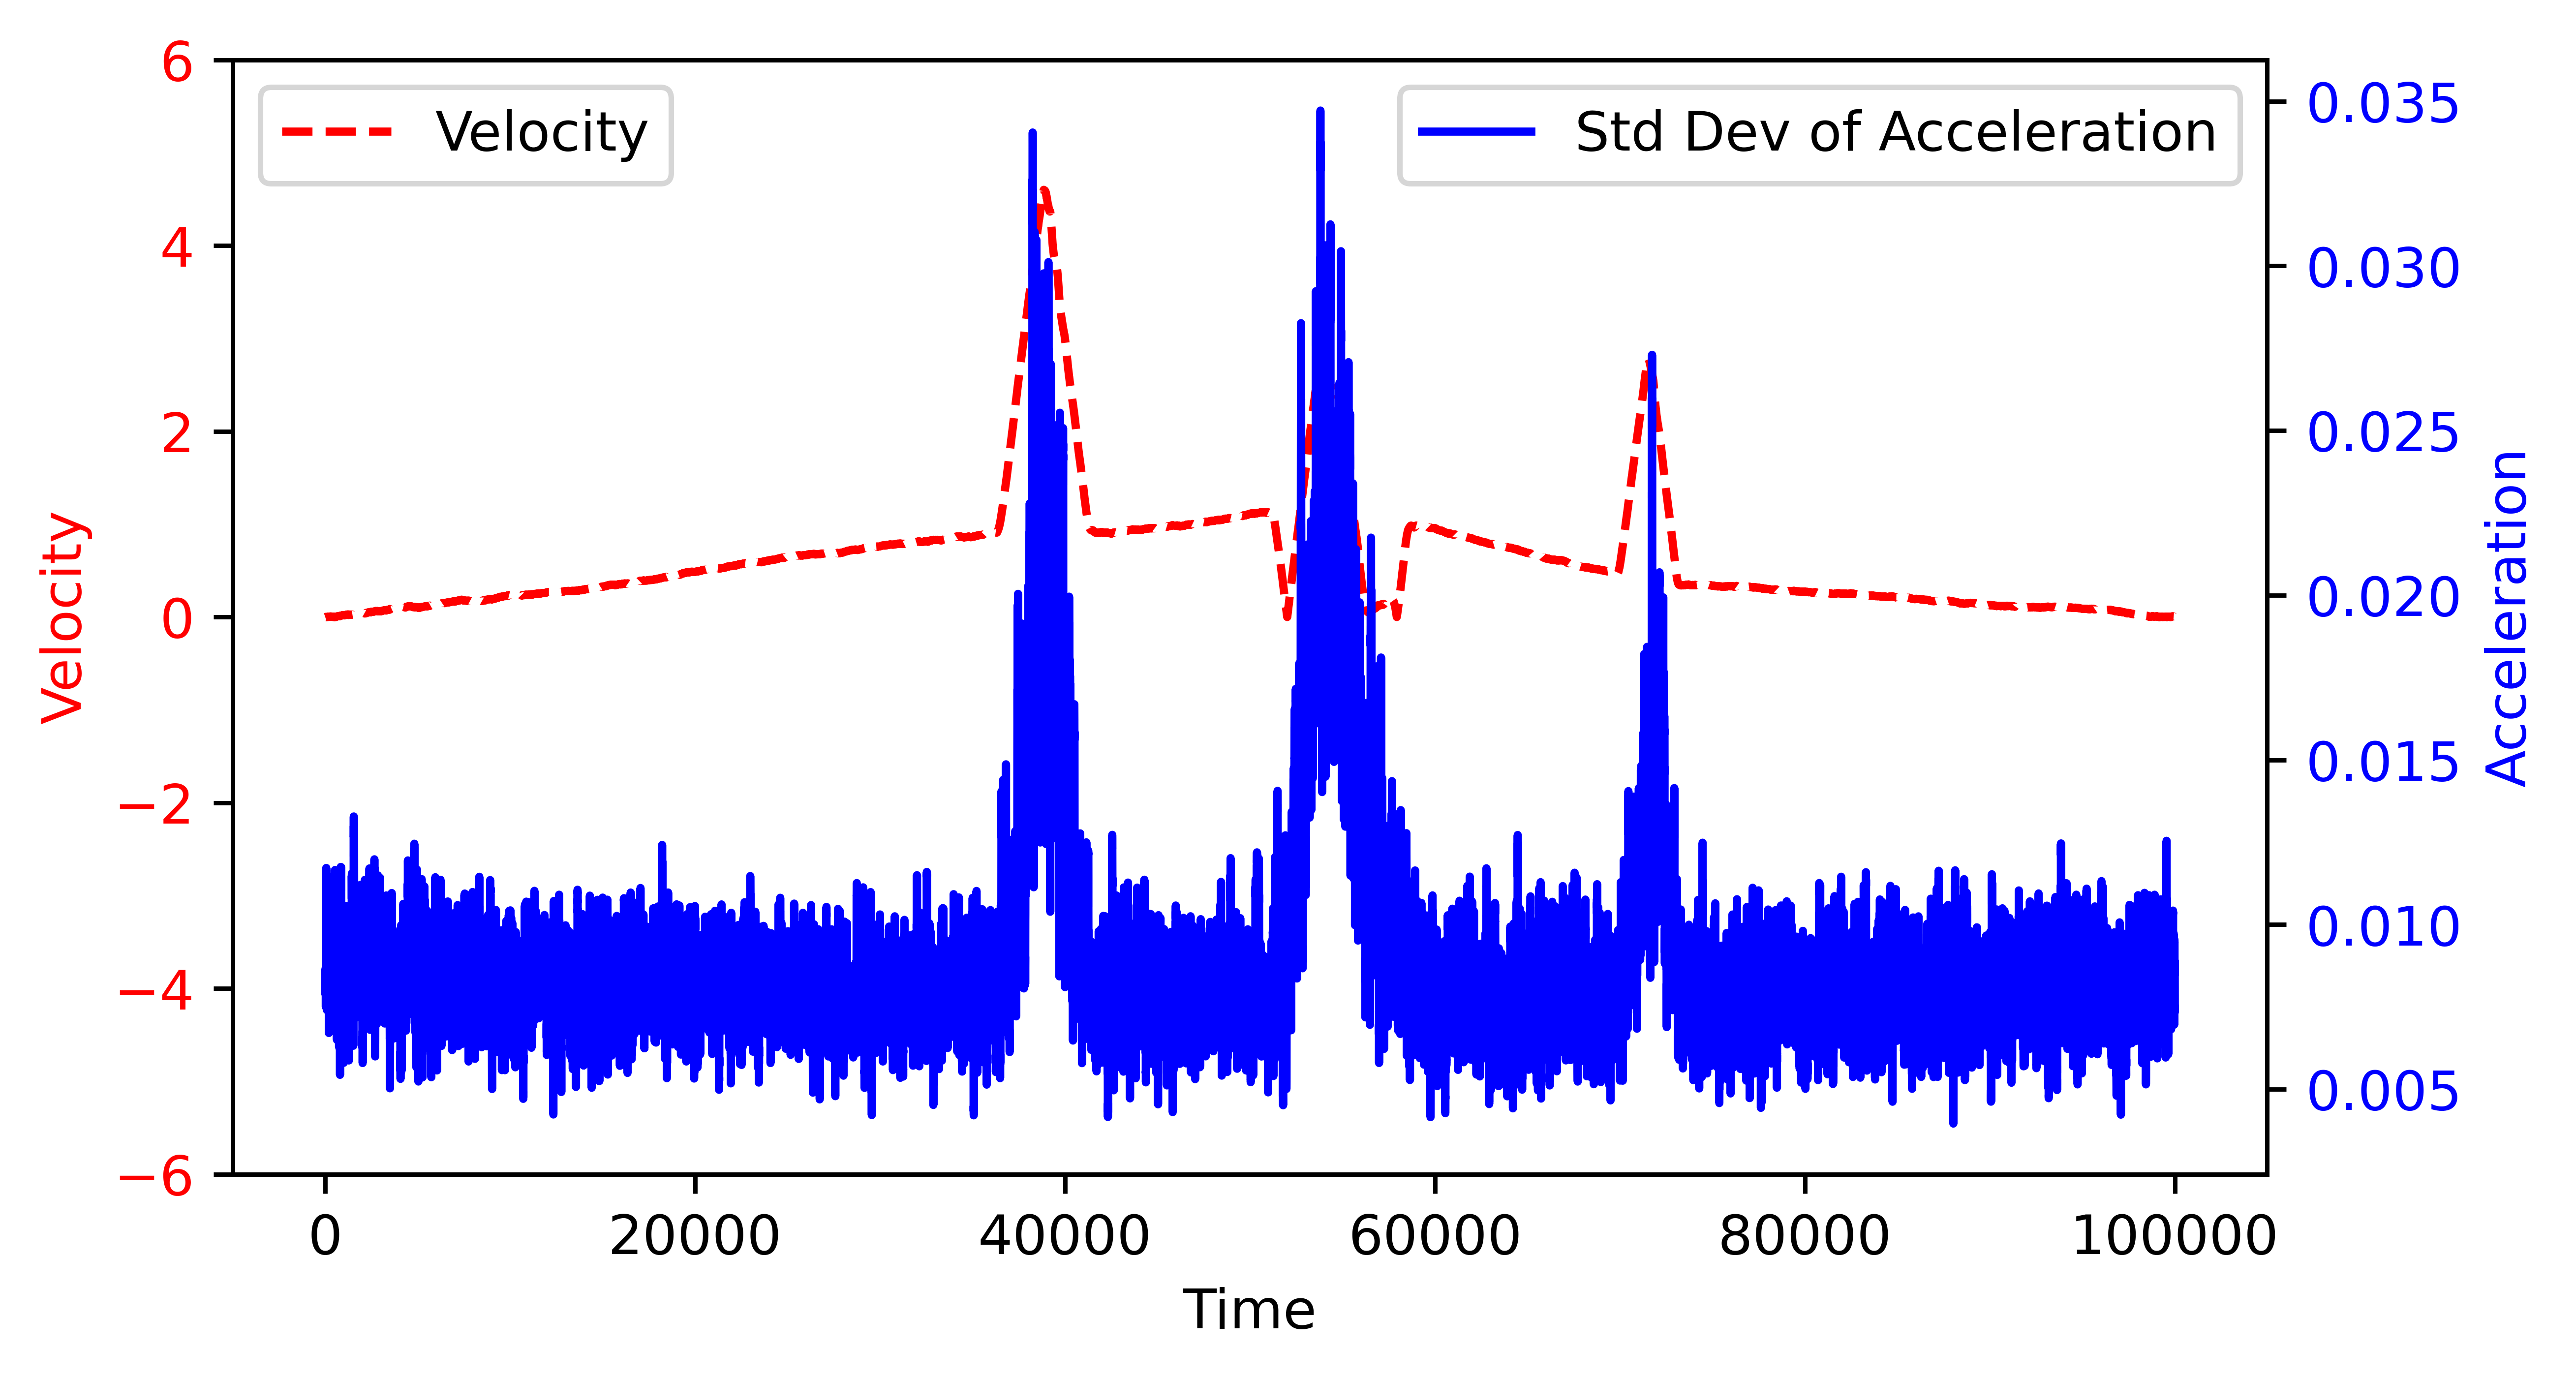

In [17]:
fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 

ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red') 
ax1.plot(range(len(Velocity)), Velocity, color = 'red', linestyle = 'dashed', label='Velocity' )
ax1.tick_params(axis ='y', labelcolor = 'red') 
plt.ylim(-6,6)
legend_1 = ax1.legend(loc=2)
legend_1.remove()

# Adding Twin Axes

ax2 = ax1.twinx() 

ax2.set_ylabel('Acceleration', color = 'blue') 
ax2.plot(range(len(Velocity)), StdDevs[start:end], color = 'blue', label='Std Dev of Acceleration') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
#plt.ylim(-0.06,0.06)
ax2.legend(loc=1)
ax2.add_artist(legend_1)
# Show plot

plt.show()

In [18]:
SmoothDev = cf.Smoothing(StdDevs,3)

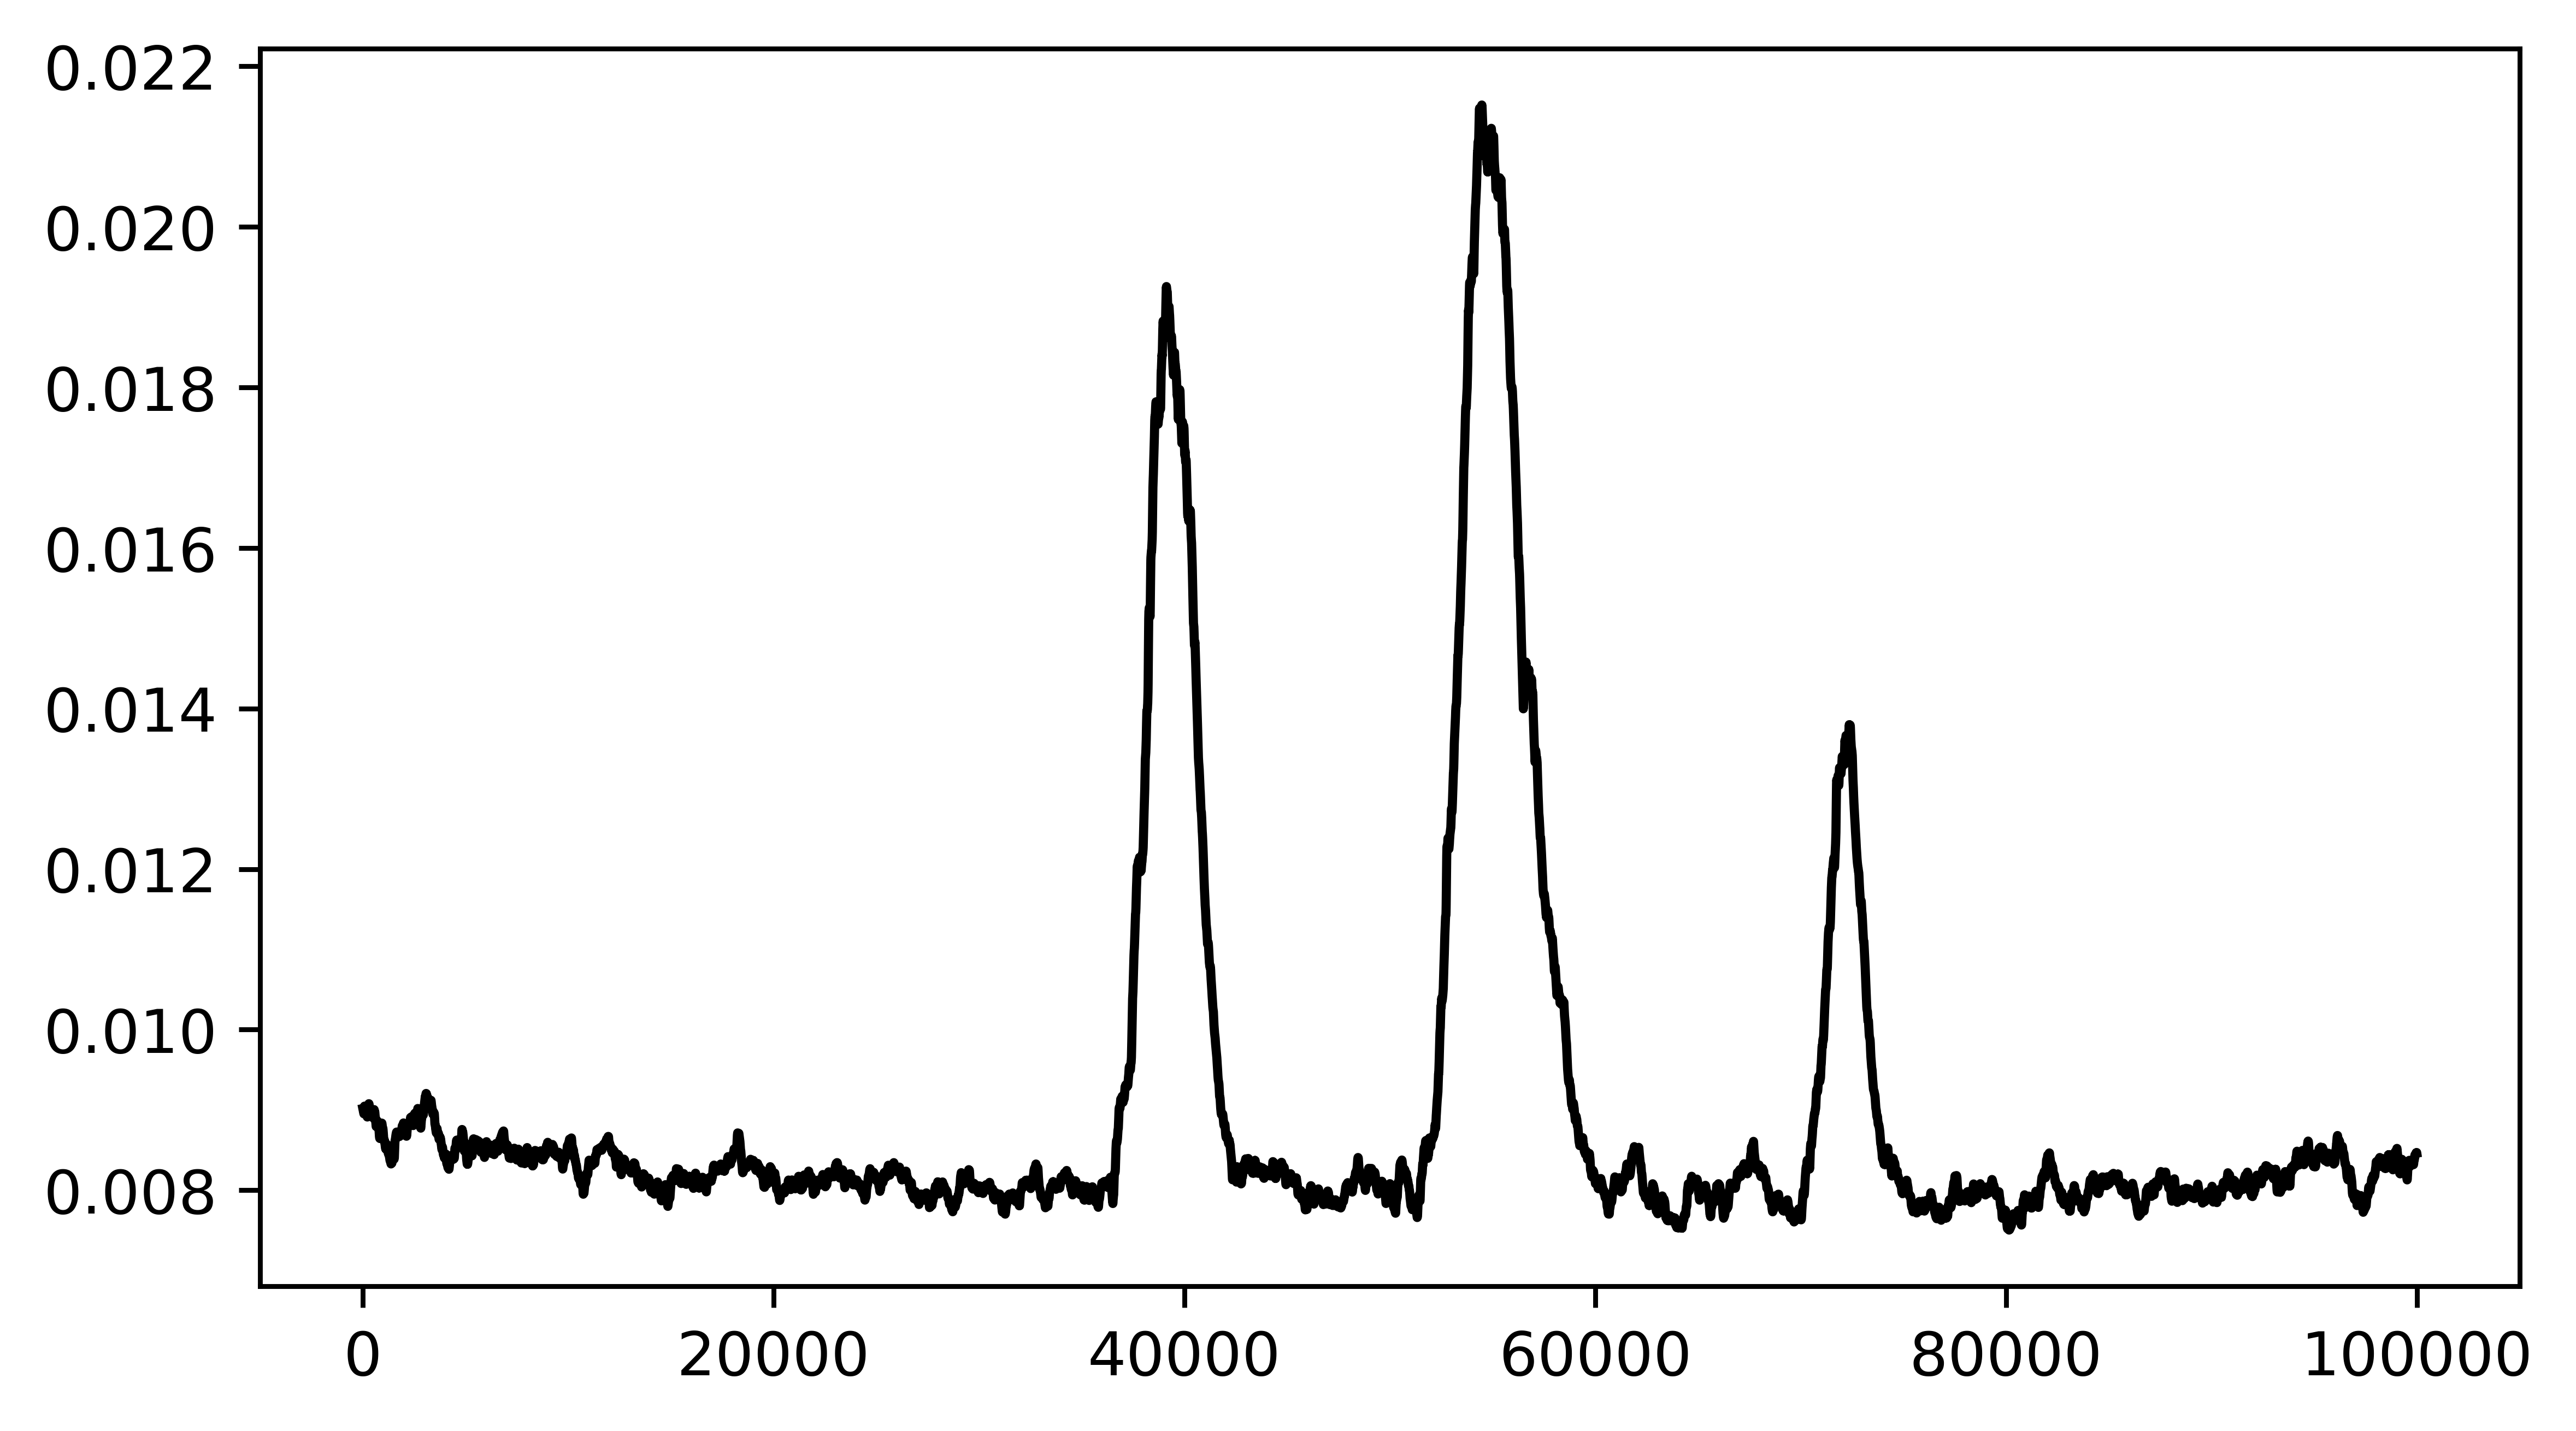

In [19]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(SmoothDev[start:end])
plt.show()

In [20]:
StallRange = 5000
SquelchLevel = 0.0085

SquelchSignal = []

for i in range(StallRange):
    SquelchSignal.append(1)

for i in range(len(SmoothDev)-2*StallRange):
    if np.average(SmoothDev[i:i+2*StallRange]) < SquelchLevel:
        SquelchSignal.append(0)
    else:
        SquelchSignal.append(1)

for i in range(StallRange):
    SquelchSignal.append(1)

In [21]:
def getVelocity3(Acceleration, Timestamps = 0.003, Squelch = [], corrected = 0):
    velocity = np.zeros(len(Acceleration))
    
    if len(Timestamps) == 1:
        dTime = Timestamps
    elif len(Timestamps) == len(Acceleration):
        totTime = 0
        for i in range(len(Timestamps)-1):
            if Timestamps[i]<Timestamps[i+1]:
                totTime += (Timestamps[i+1] - Timestamps[i])
            else:
                totTime += (Timestamps[i+1] - Timestamps[i] + 10000)
        dTime = totTime / len(Timestamps)
    else:
        print('error')

    dTime = dTime / 10000.0

    velocity[0] = Acceleration[0] * (dTime)

    for i in range(len(Acceleration)-2):
        j = i + 1
        if corrected ==2:
            if Squelch[j]==0:
                velocity[j]=0
            else:
                velocity[j] = velocity[i] + Acceleration[j] * dTime                
        else:
            velocity[j] = velocity[i] + Acceleration[j] * dTime

    if corrected == 1:
        PointVairance = velocity[-1:] / len(velocity)
        for i in range(len(velocity)):
            velocity[i] -=  PointVairance * i
    
    velocity *= 9.81

    return velocity



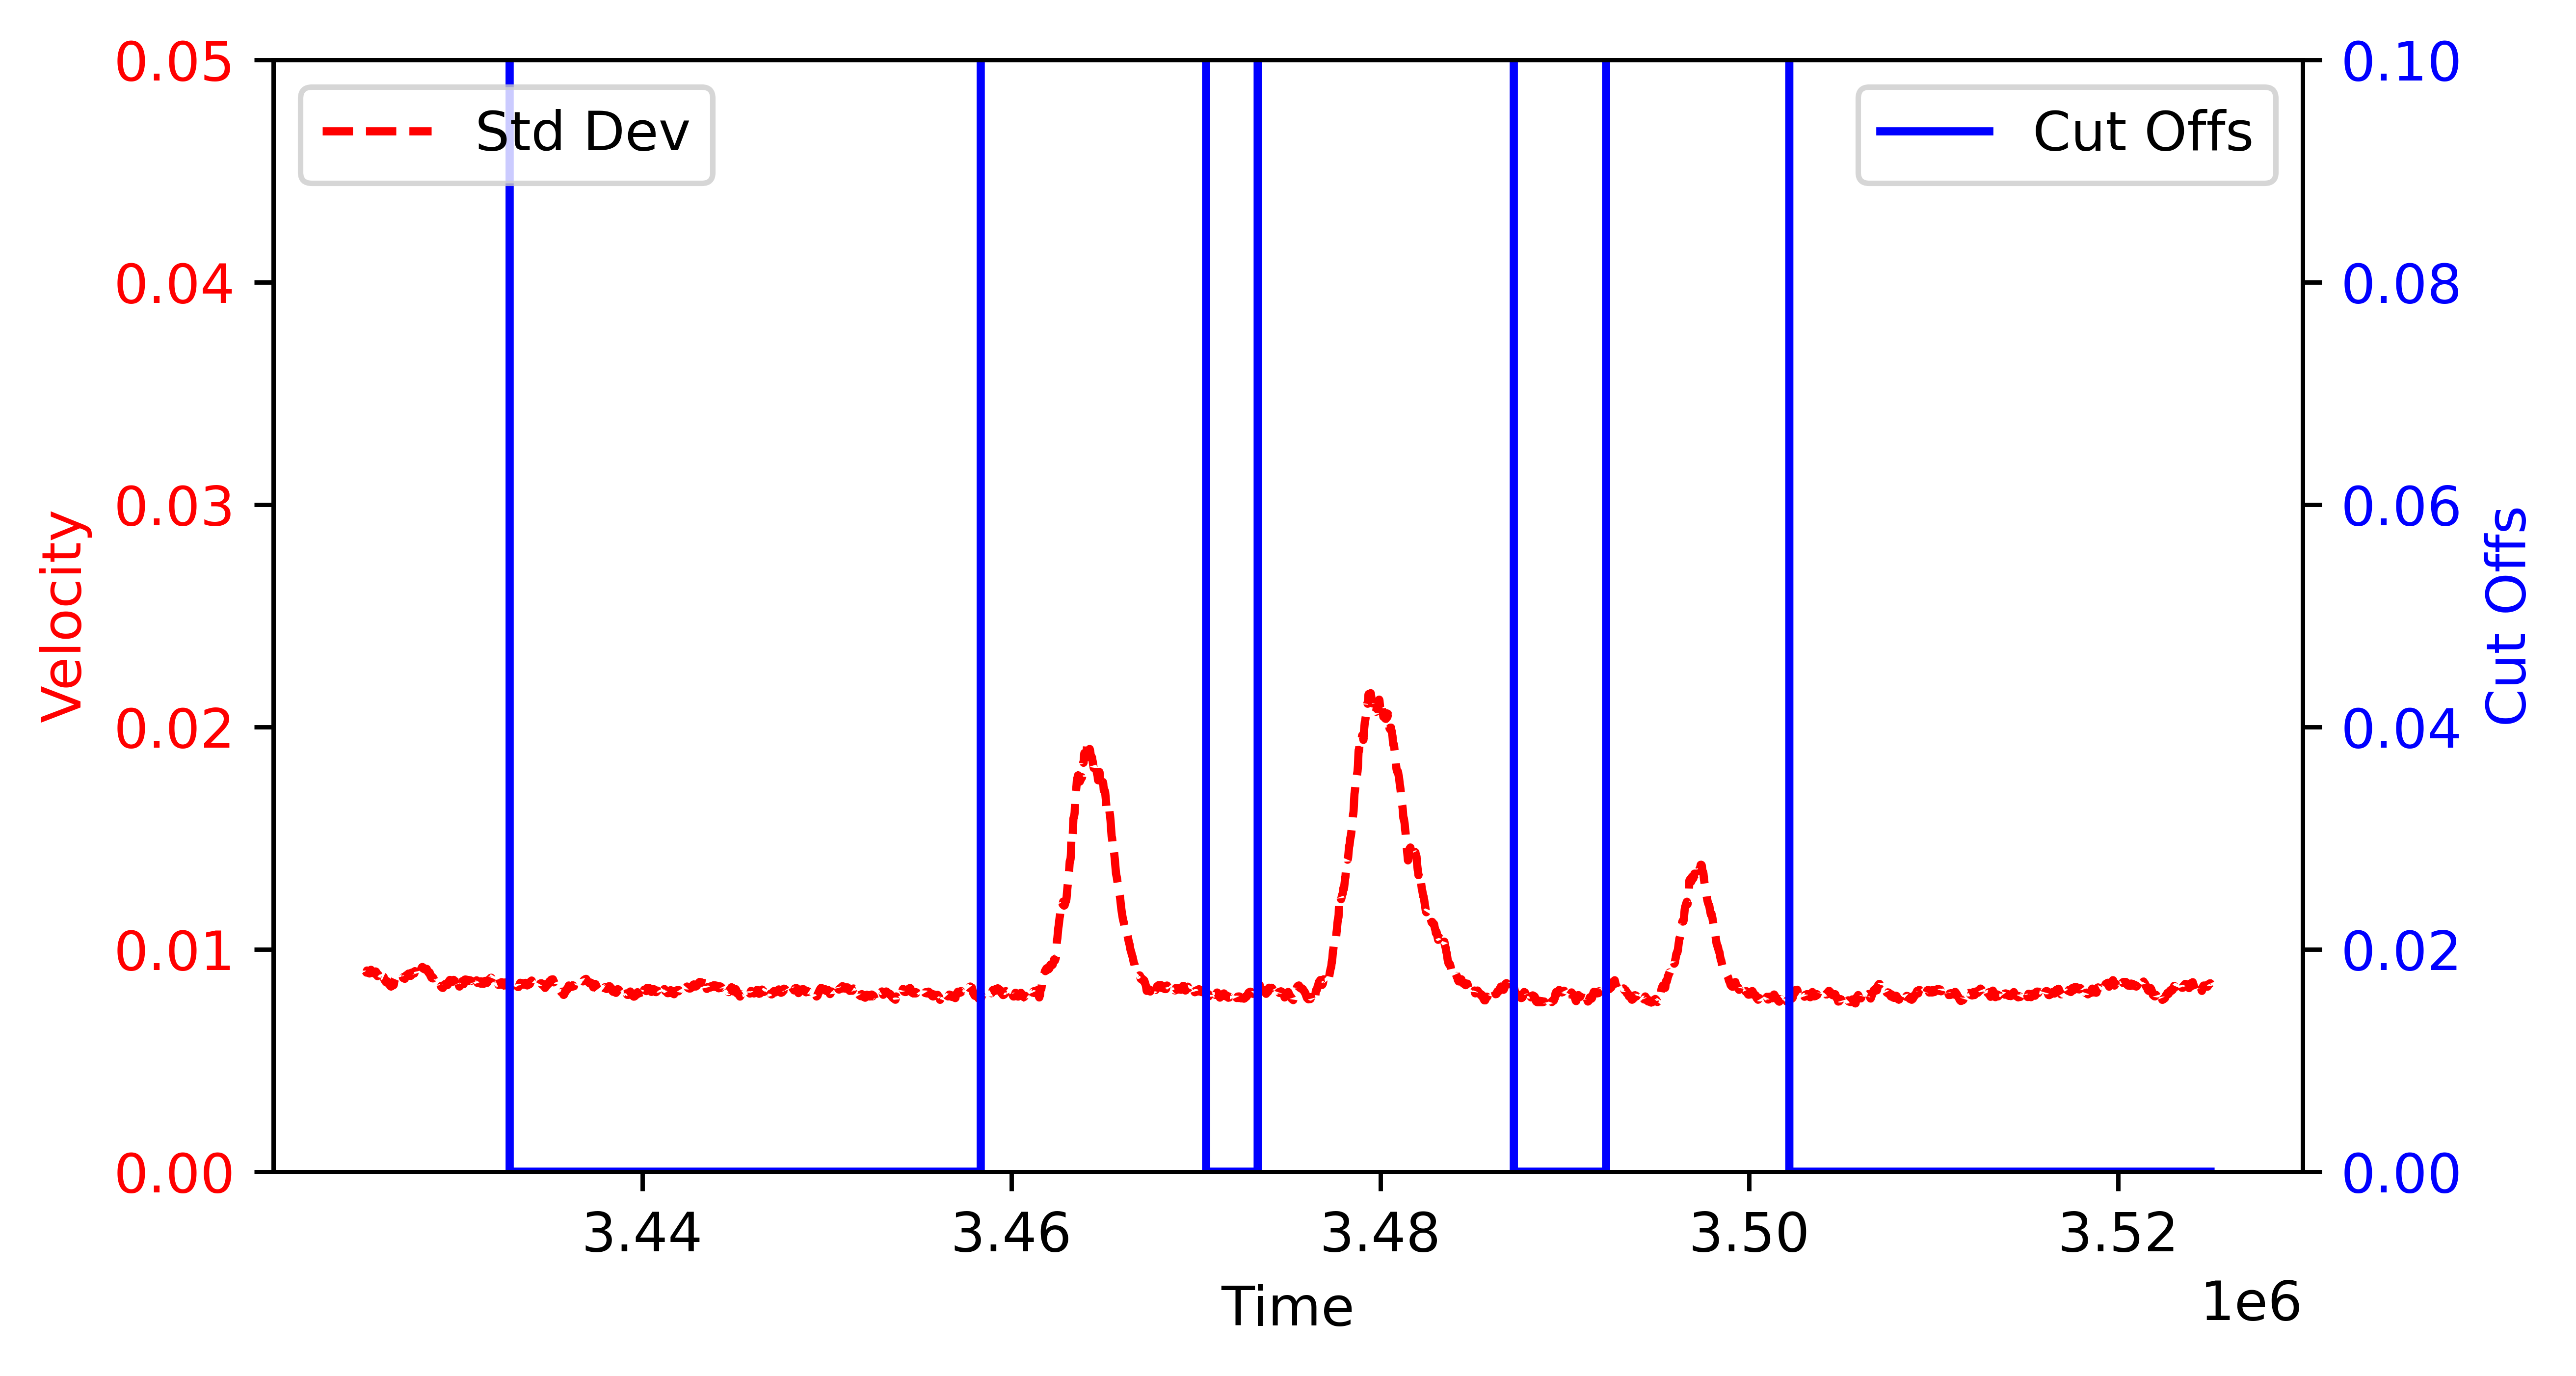

In [22]:
fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 

plotRange = np.array(range(end-start))+start

ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red') 
ax1.plot(plotRange, SmoothDev[start:end], color = 'red', linestyle = 'dashed', label='Std Dev' )
ax1.tick_params(axis ='y', labelcolor = 'red') 
plt.ylim(0,0.05)
legend_1 = ax1.legend(loc=2)
legend_1.remove()

# Adding Twin Axes

ax2 = ax1.twinx() 

ax2.set_ylabel('Cut Offs', color = 'blue') 
ax2.plot(plotRange, SquelchSignal[start:end], color = 'blue', label='Cut Offs') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
plt.ylim(0,0.1)
ax2.legend(loc=1)
ax2.add_artist(legend_1)
# Show plot

plt.show()

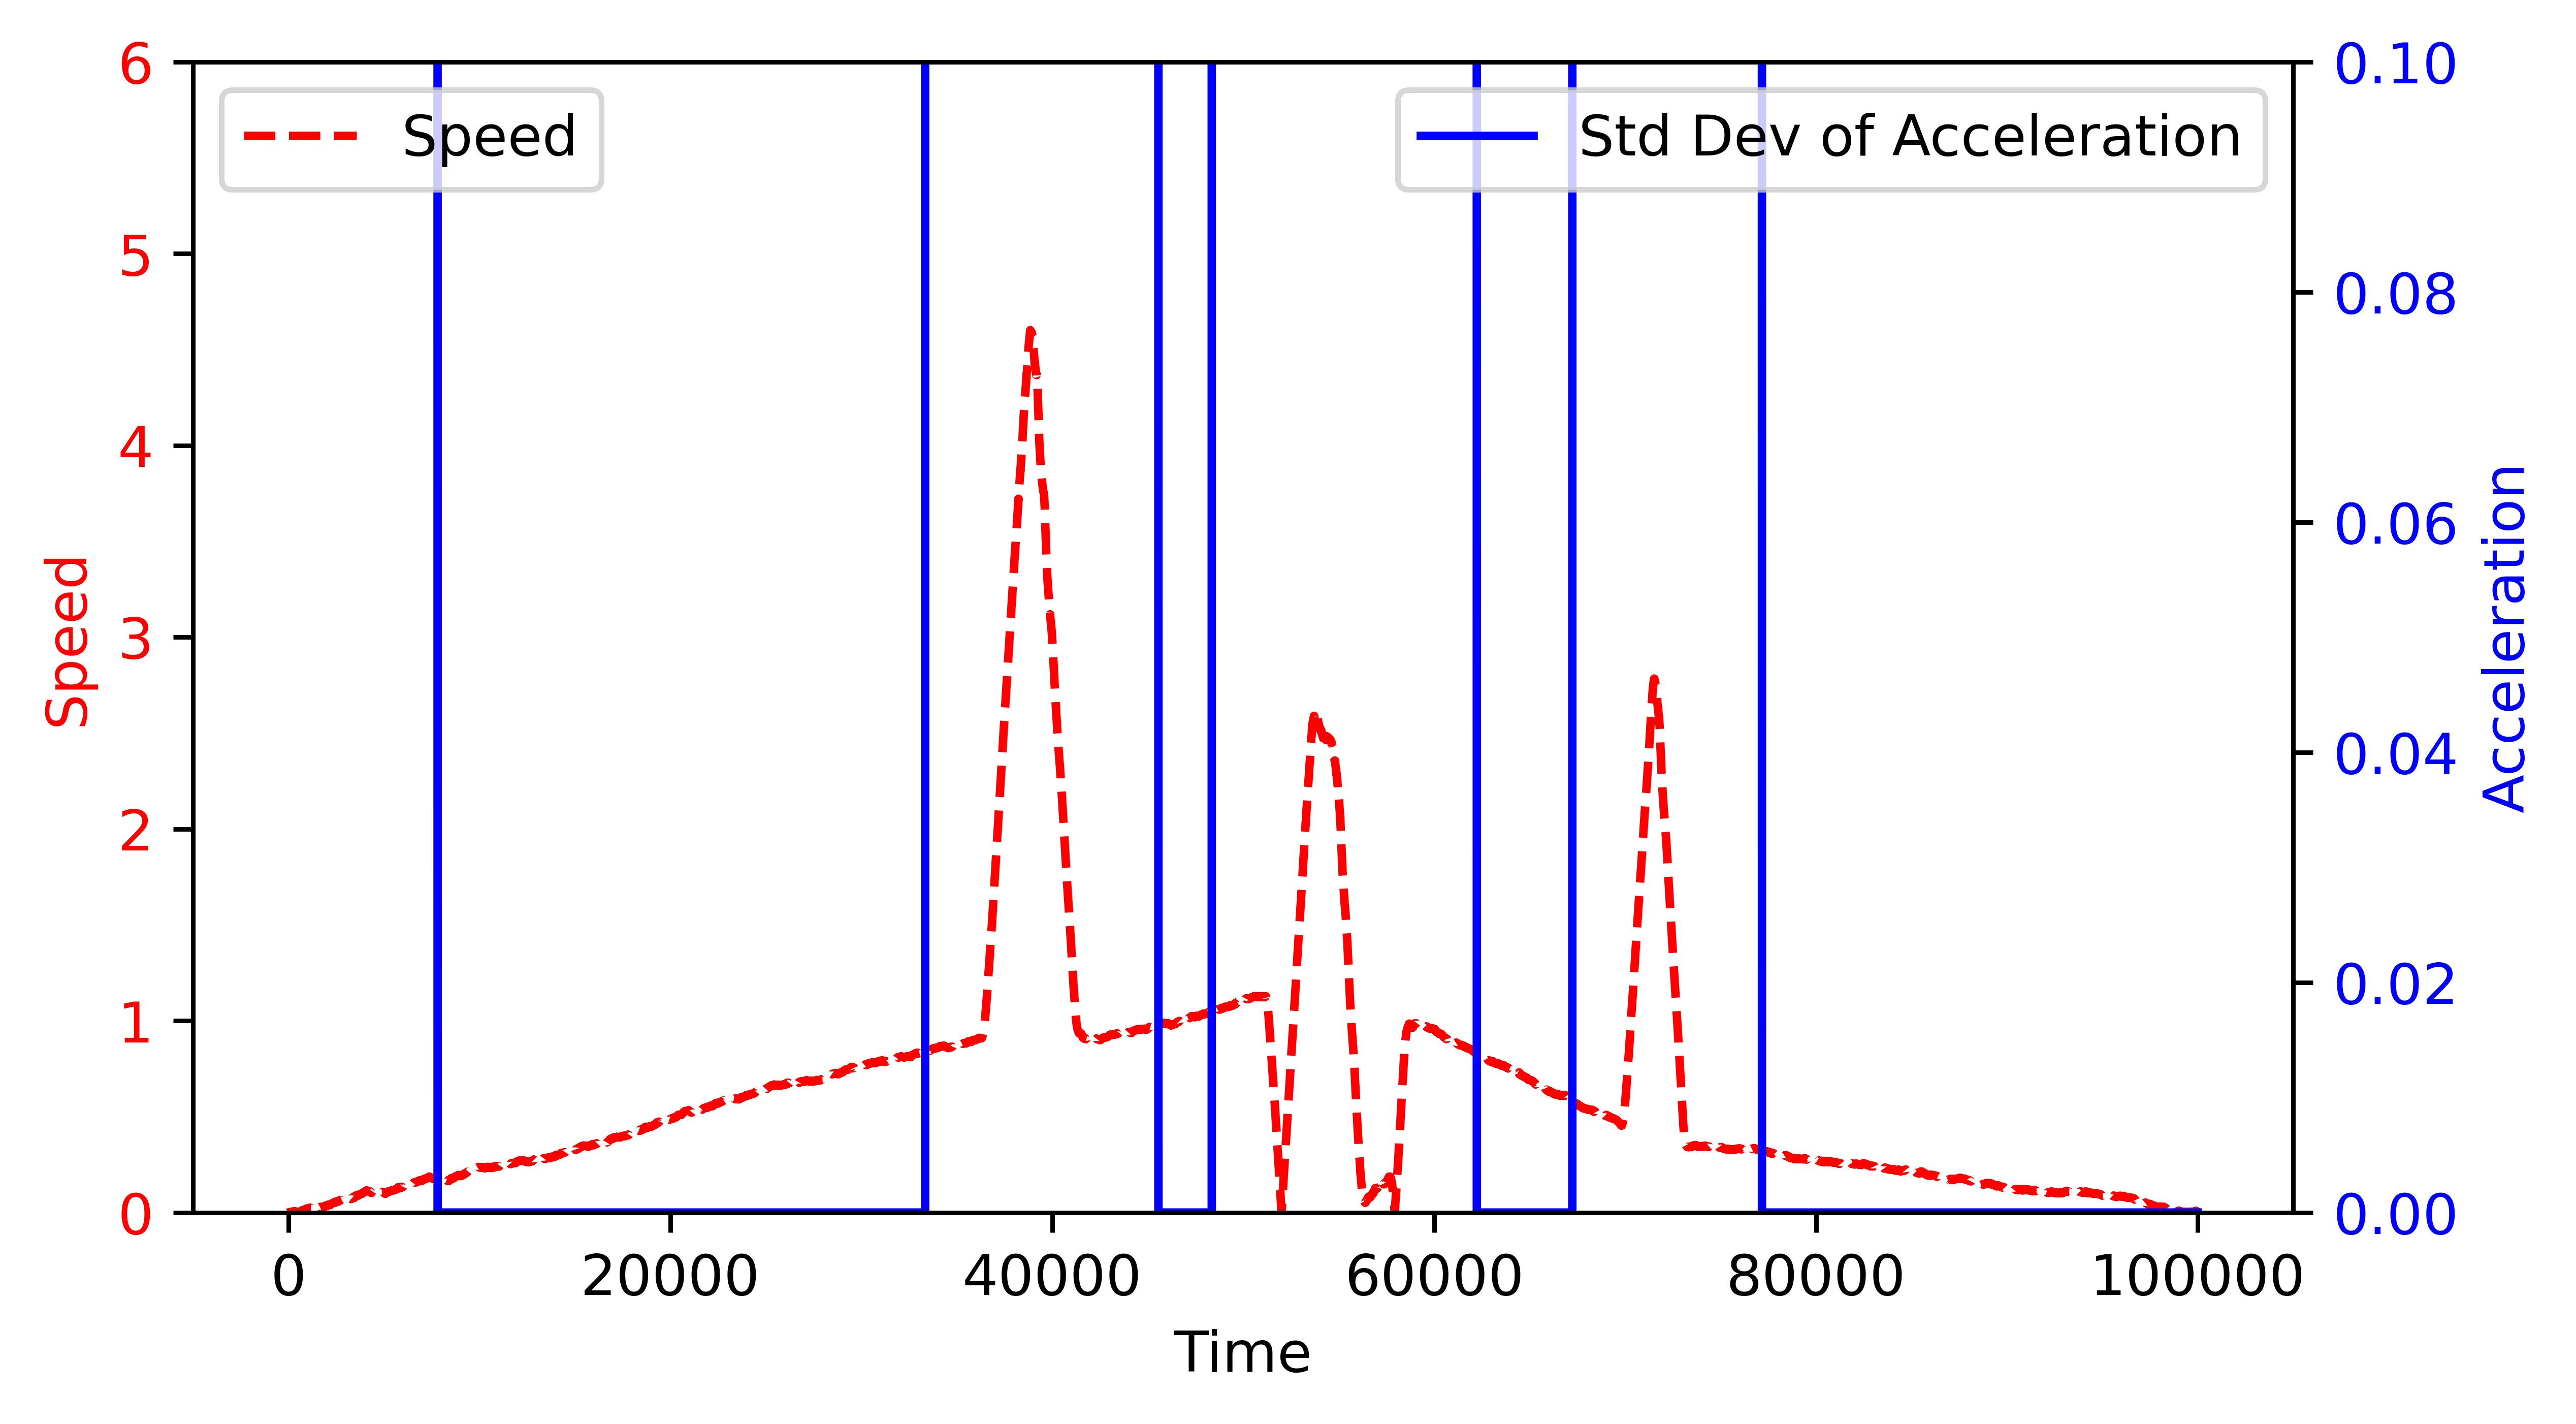

In [23]:
Velocity = getVelocity(Smooth[start:end], ODataSet[start:end,2],1)

Velocity = np.abs(Velocity)

fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 

ax1.set_xlabel('Time') 
ax1.set_ylabel('Speed', color = 'red') 
ax1.plot(range(len(Velocity)), Velocity, color = 'red', linestyle = 'dashed', label='Speed' )
ax1.tick_params(axis ='y', labelcolor = 'red') 
plt.ylim(0,6)
legend_1 = ax1.legend(loc=2)
legend_1.remove()

# Adding Twin Axes

ax2 = ax1.twinx() 

ax2.set_ylabel('Acceleration', color = 'blue') 
ax2.plot(range(len(Velocity)), SquelchSignal[start:end], color = 'blue', label='Std Dev of Acceleration') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
plt.ylim(0,0.1)
ax2.legend(loc=1)
ax2.add_artist(legend_1)
# Show plot

plt.show()

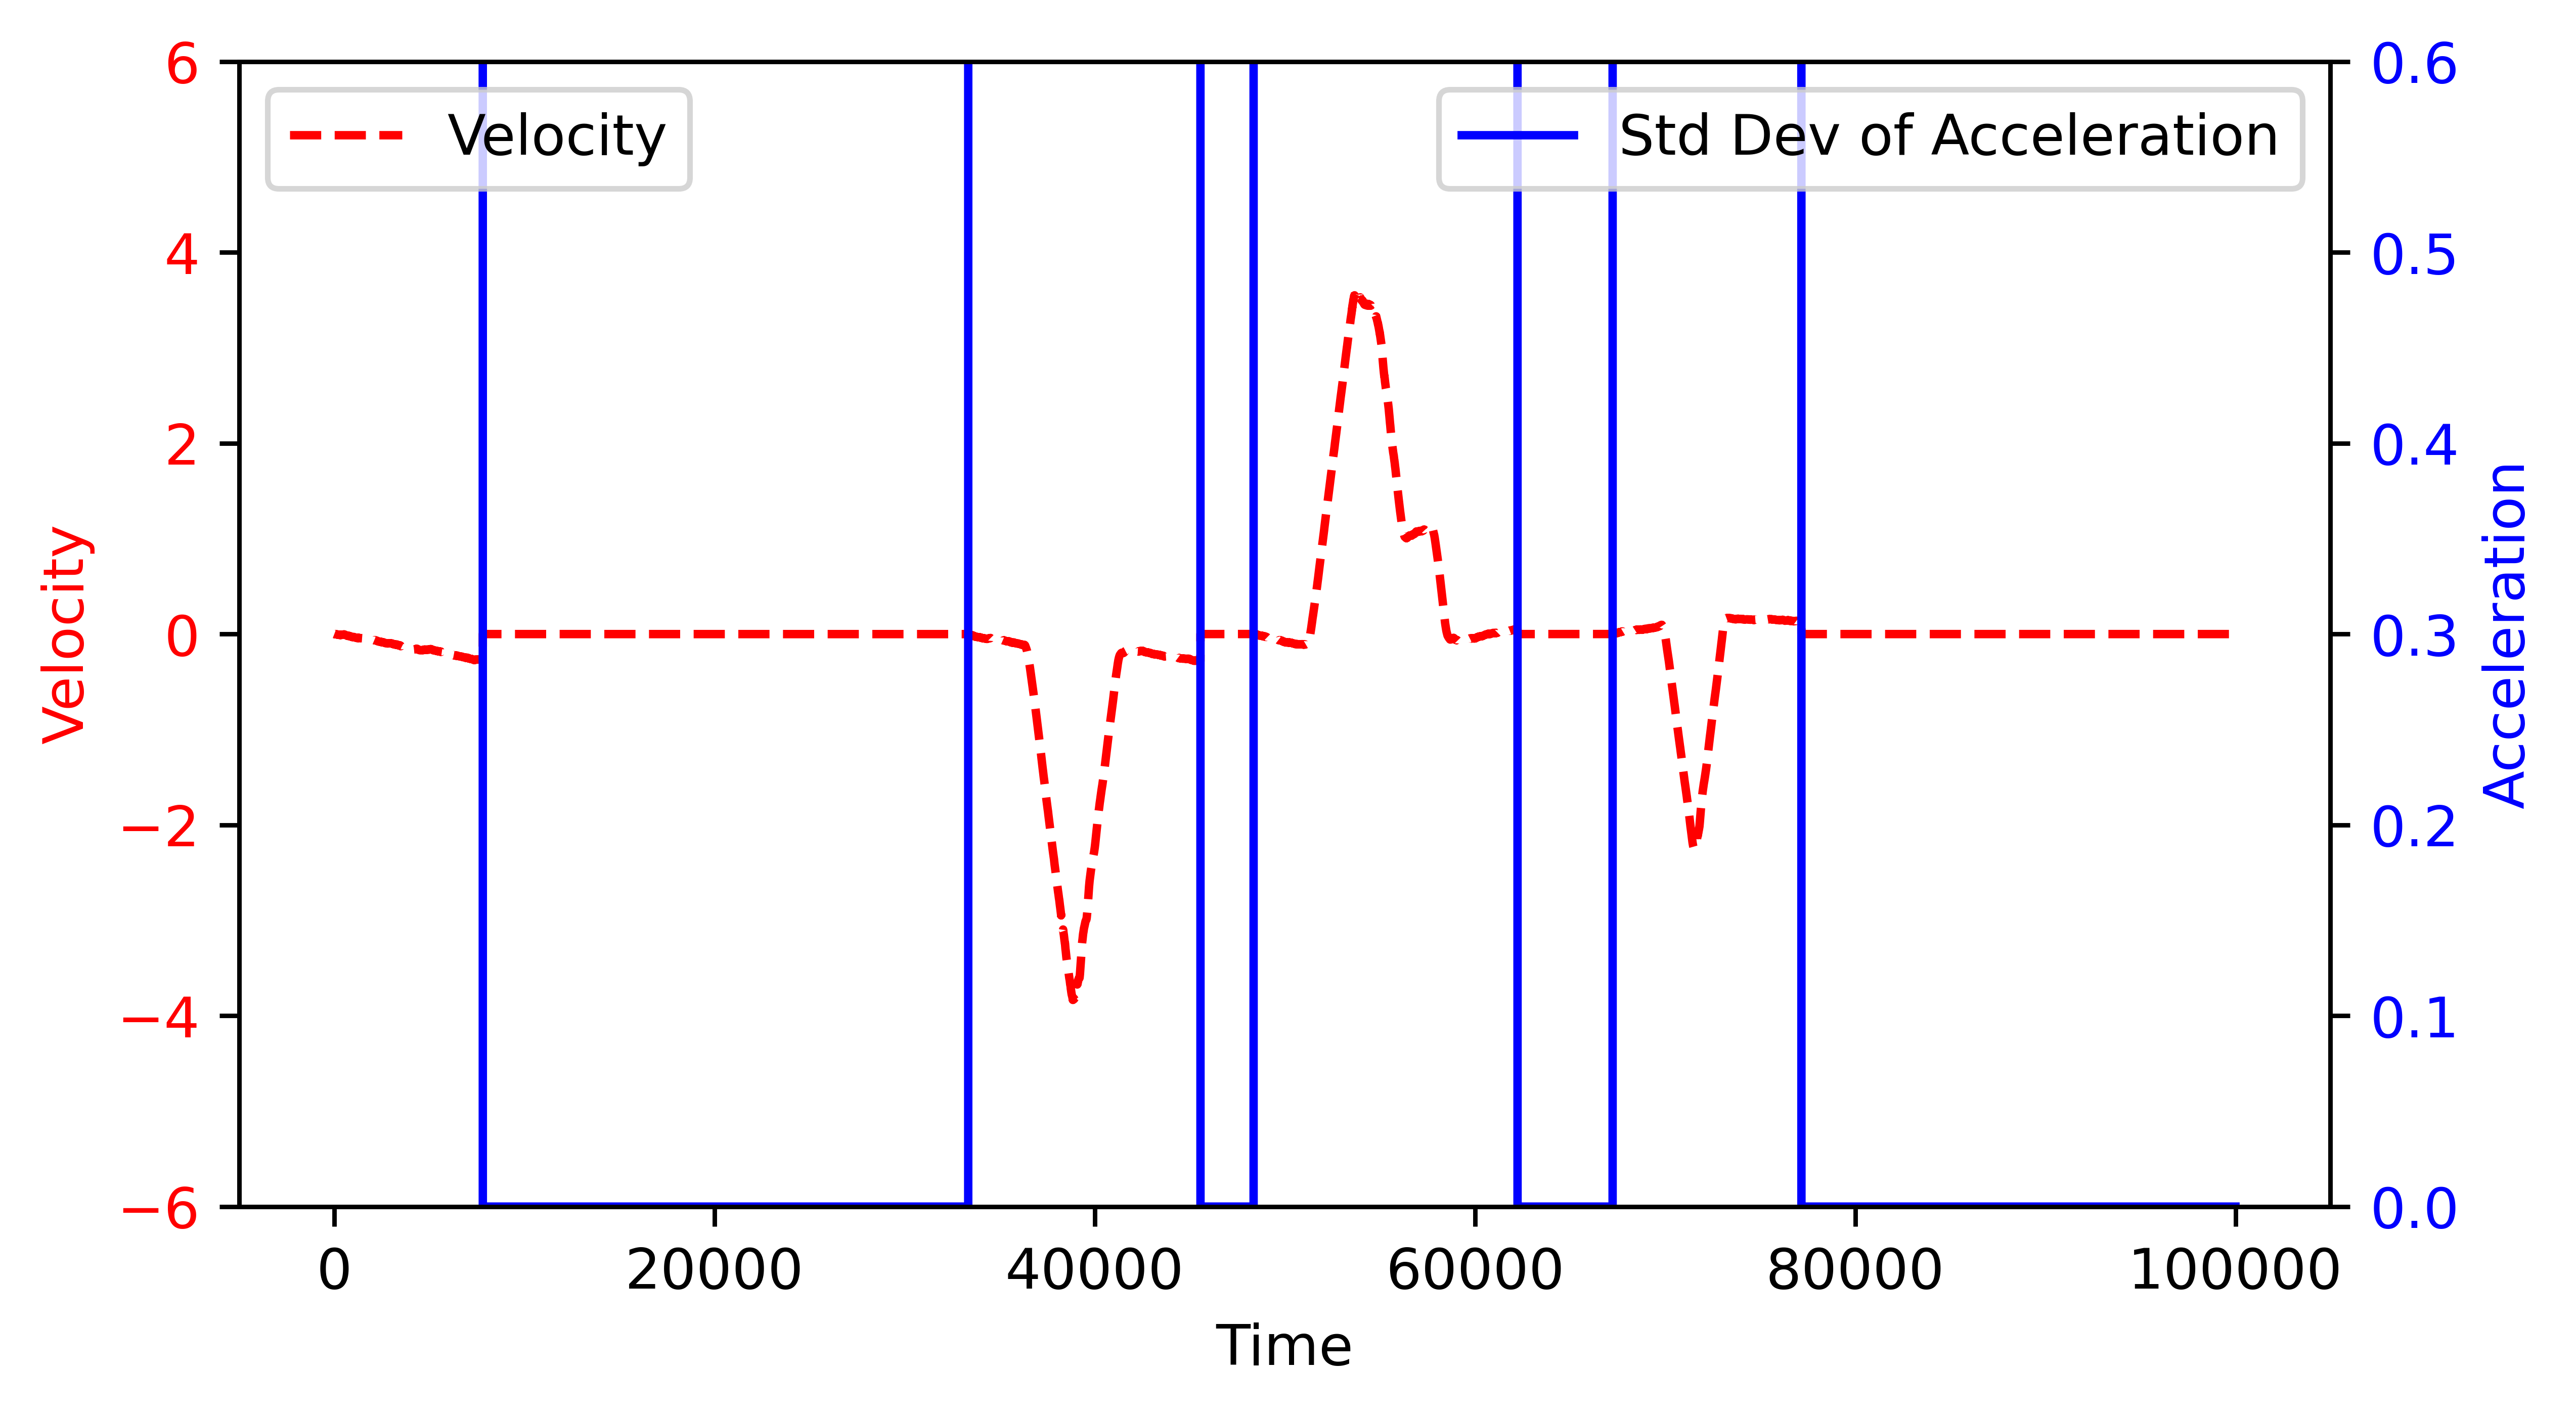

In [24]:
Velocity = getVelocity3(Smooth[start:end], ODataSet[start:end,2], SquelchSignal[start:end],2)

#Velocity = np.abs(Velocity)

fig, ax1 = plt.subplots(figsize=(6.67,3.75),dpi=800,linewidth=0.5) 

ax1.set_xlabel('Time') 
ax1.set_ylabel('Velocity', color = 'red') 
ax1.plot(range(len(Velocity)), Velocity, color = 'red', linestyle = 'dashed', label='Velocity' )
ax1.tick_params(axis ='y', labelcolor = 'red') 
plt.ylim(-6,6)
legend_1 = ax1.legend(loc=2)
legend_1.remove()

# Adding Twin Axes

ax2 = ax1.twinx() 

ax2.set_ylabel('Acceleration', color = 'blue') 
ax2.plot(range(len(Velocity)), SquelchSignal[start:end], color = 'blue', label='Std Dev of Acceleration') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
plt.ylim(0.0,0.6)
ax2.legend(loc=1)
ax2.add_artist(legend_1)
# Show plot

plt.show()

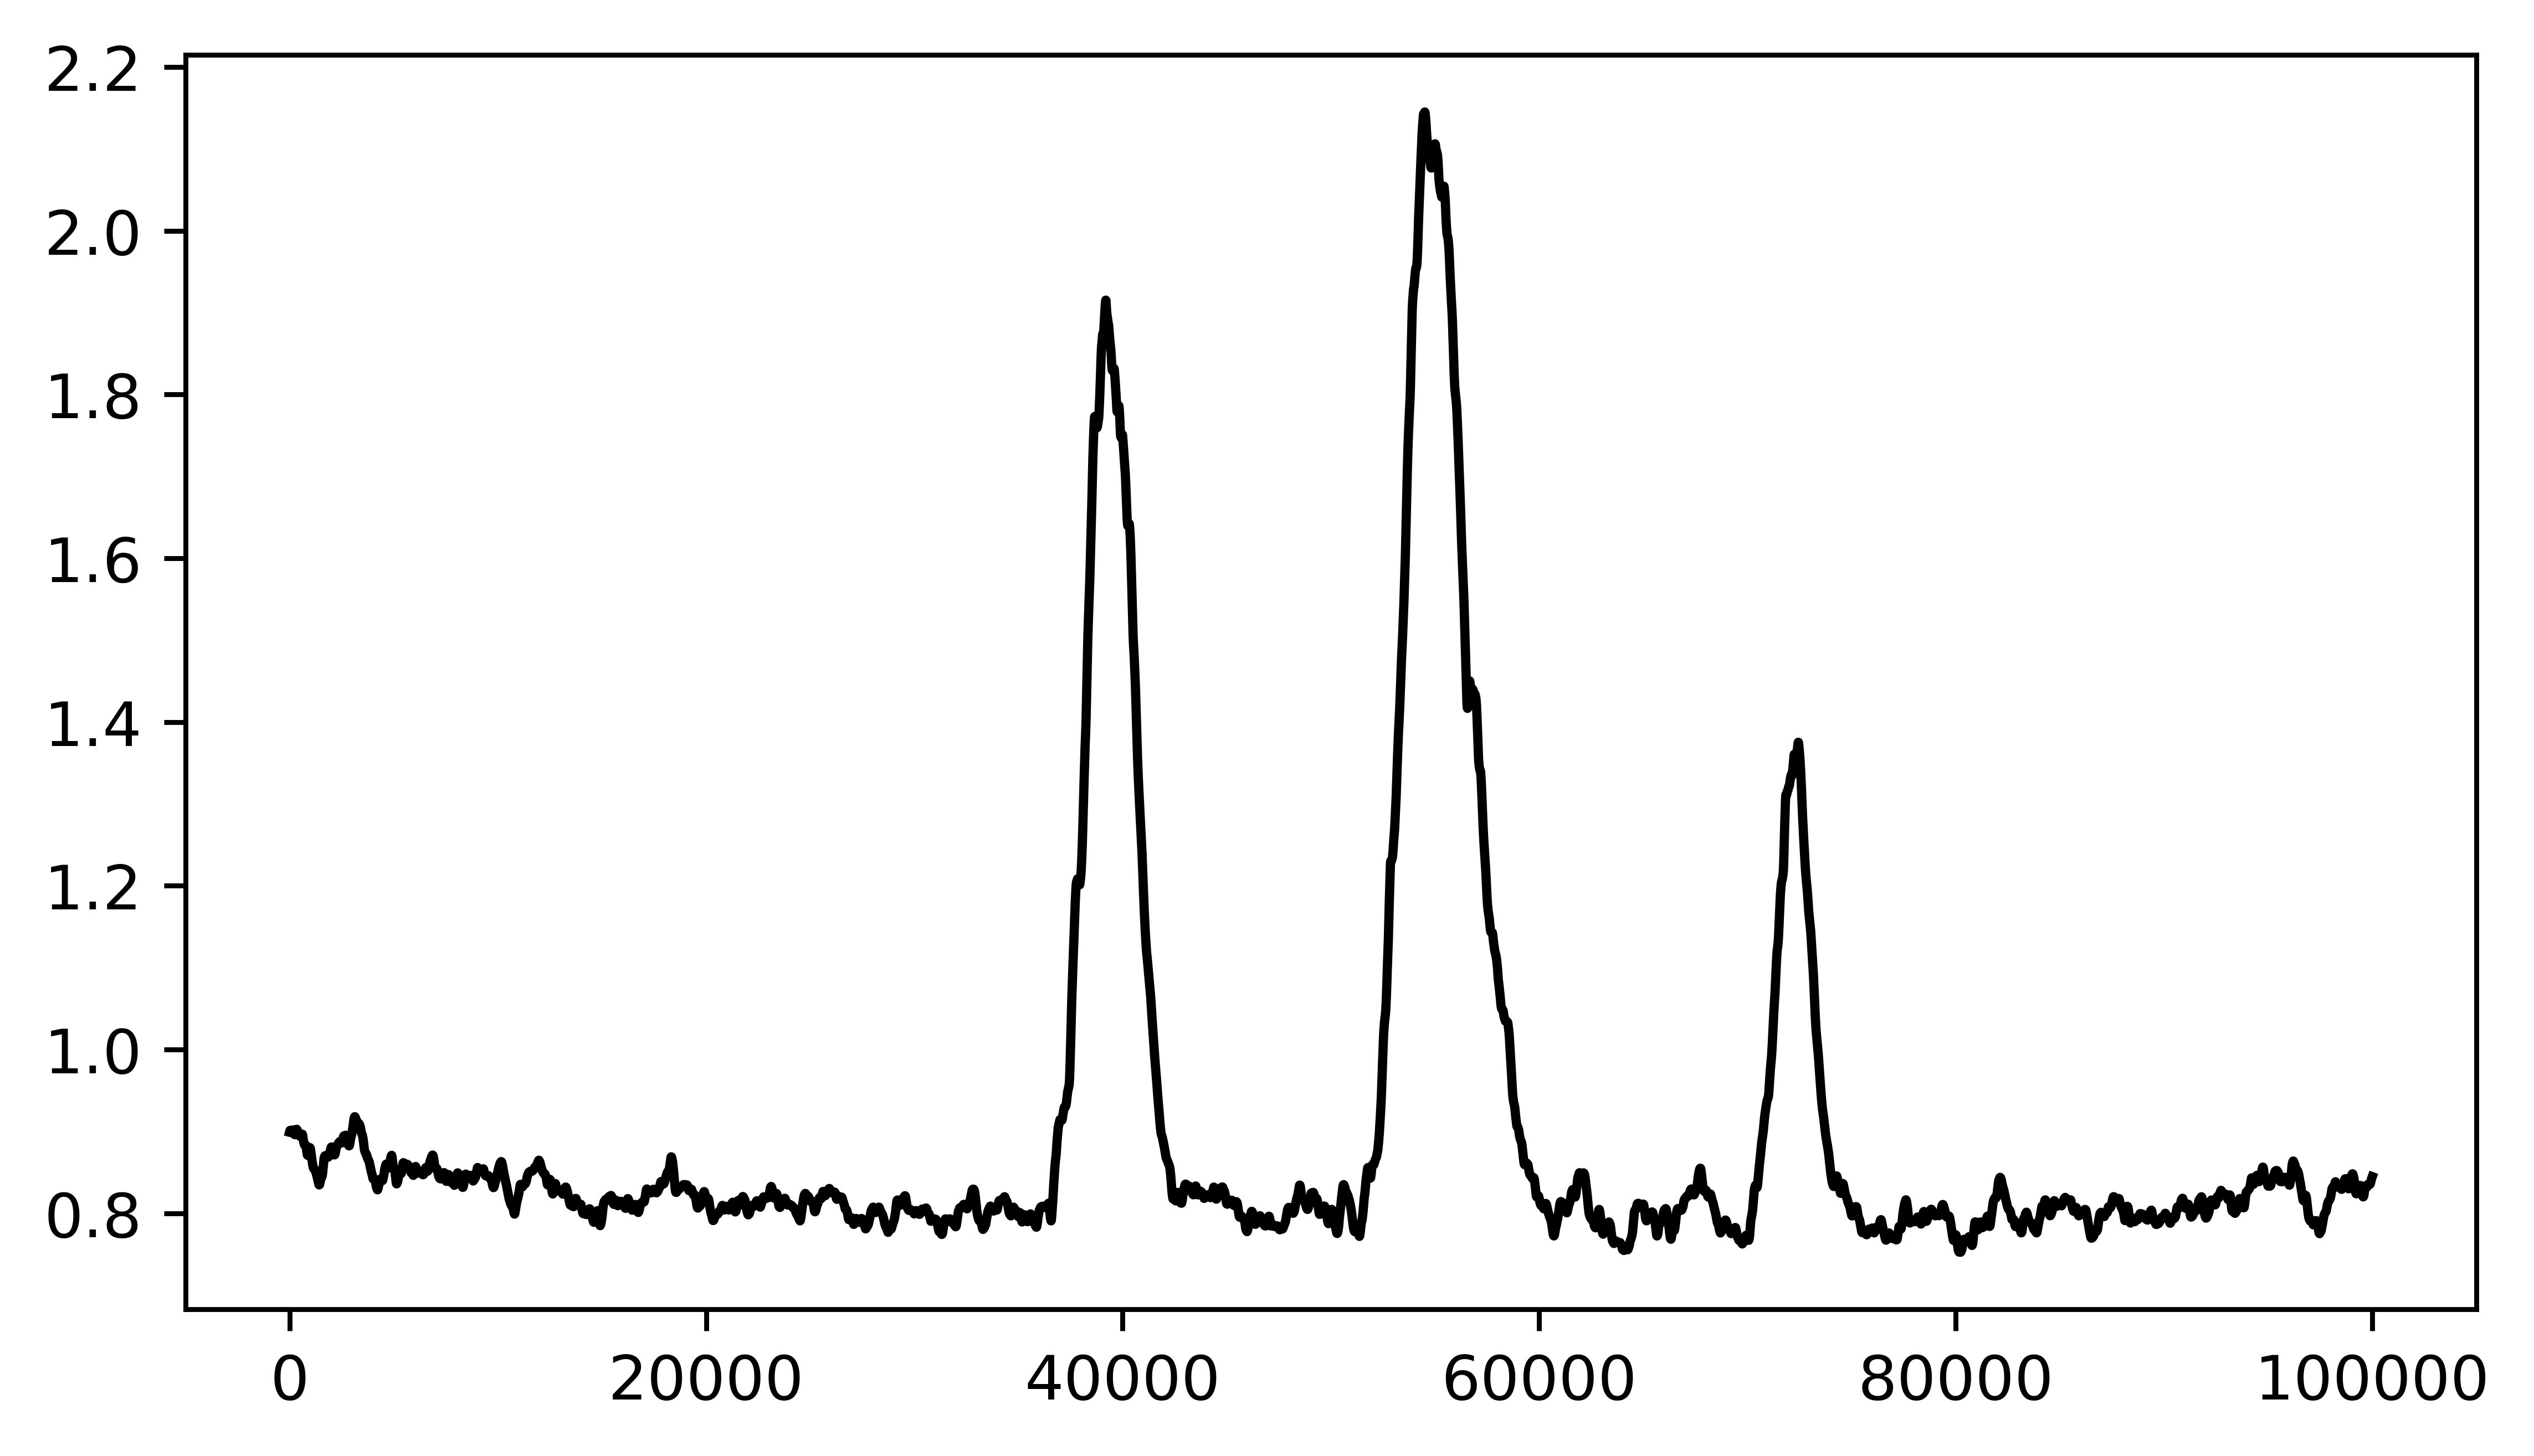

In [25]:

RollSumStdDev = RollingSum(SmoothDev)

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(RollSumStdDev[start:end])
plt.show()

In [26]:
print(np.size(Smooth), np.size(ODataSet[:,2]), np.size(SquelchSignal))

6874827 6874827 6874826


In [27]:
Velocity = getVelocity3(Smooth, ODataSet[:,2], SquelchSignal,2)

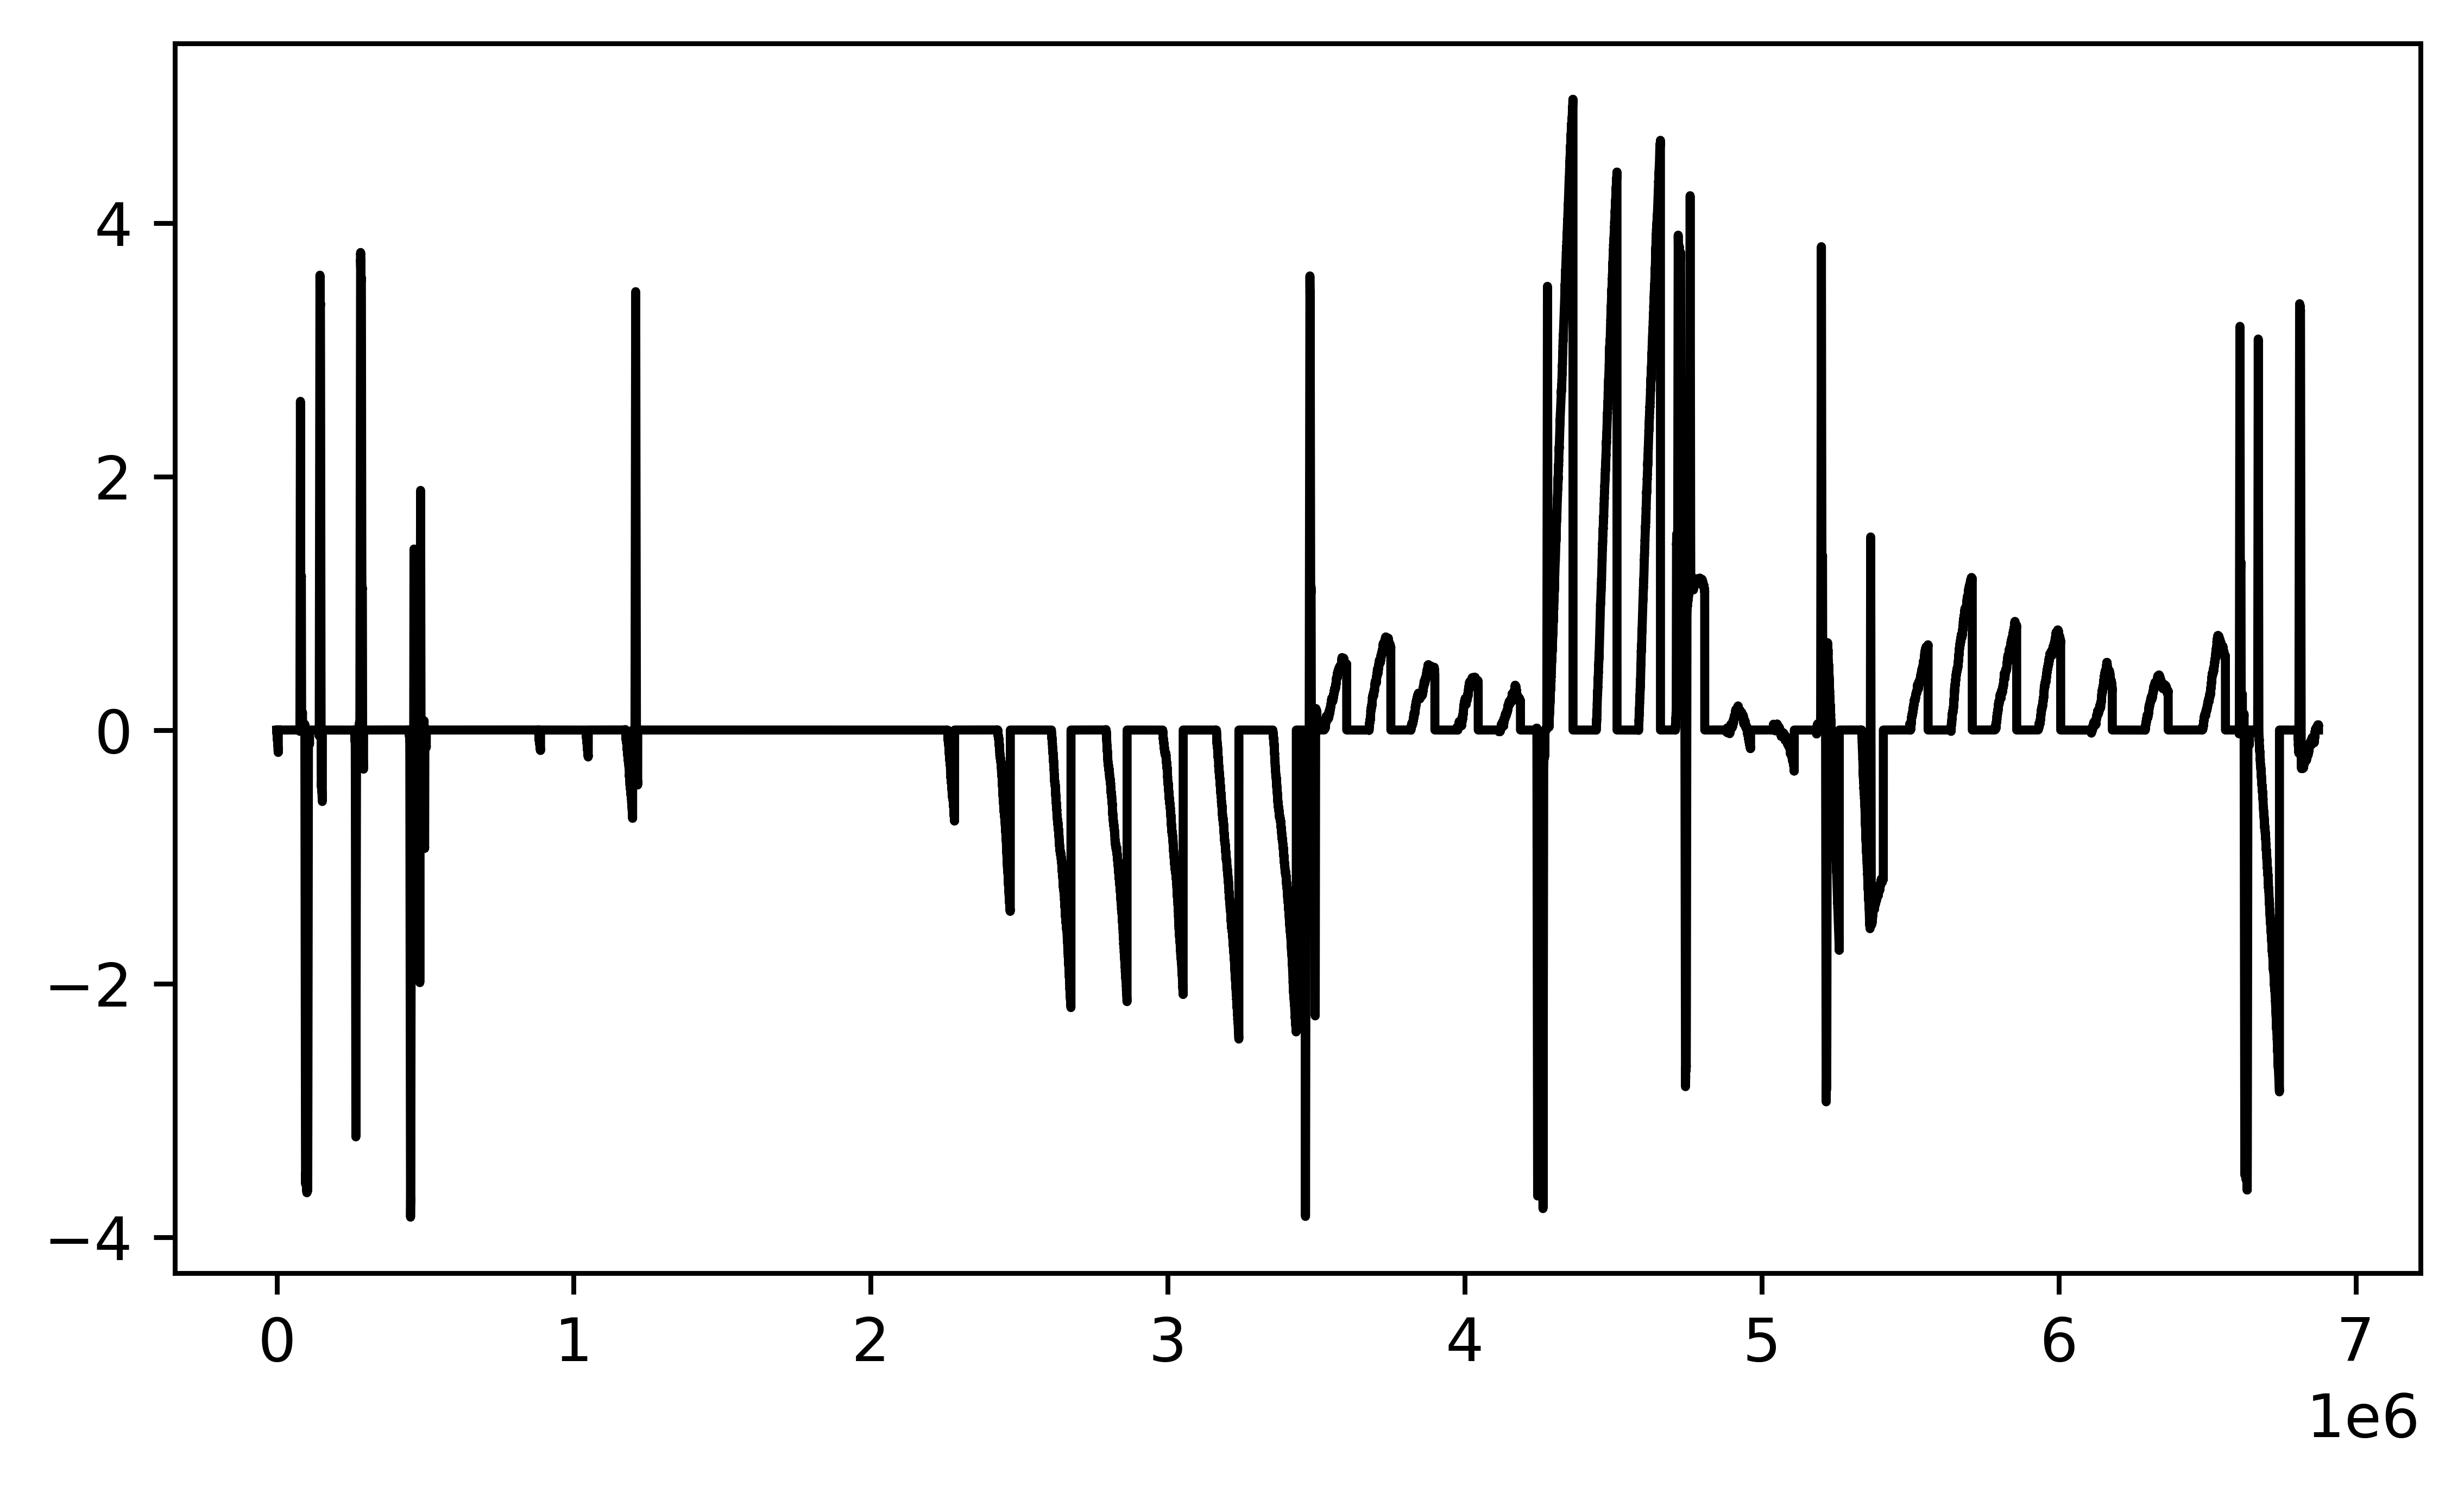

In [28]:
fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.5)
plt.plot(Velocity)
plt.show()

SmoothY = cf.Smoothing(ODataSet[:,4],3)
StdDevsY = RollingStdDev(ODataSet[:,4],SmoothY)
SmoothDevY = cf.Smoothing(StdDevsY,3)
RollSumStdDevY = RollingSum(SmoothDevY)

SmoothZ = cf.Smoothing(ODataSet[:,5],3)
StdDevsZ = RollingStdDev(ODataSet[:,5],SmoothZ)
SmoothDevZ = cf.Smoothing(StdDevsZ,3)
RollSumStdDevZ = RollingSum(SmoothDevZ)

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.25)
plt.plot(RollSumStdDevY[start:end])
plt.plot(RollSumStdDevZ[start:end])
plt.show()

fig=plt.figure(figsize=(6.67,3.75),dpi=800,linewidth=0.25)
plt.plot(SmoothY[start:end])
#plt.plot(Smooth[start:end])

plt.plot(SmoothZ[start:end]+1)
plt.show()